In [979]:
import cirq
import numpy as np

In [980]:
def int_to_Gray(base_10_num, n_qubits):
    # https://en.wikipedia.org/wiki/Gray_code

    # print(np.binary_repr(num, n_qubits)) # standard binary form!

    # The operator >> is shift right. The operator ^ is exclusive or
    gray_int = base_10_num ^ (base_10_num >> 1)

    return np.binary_repr(gray_int, n_qubits)

In [981]:
n_qubits=4
grey_state=np.array([int_to_Gray(i, n_qubits) for i in state_array])
print(grey_state)

['0000' '0001' '0011' '0010' '0110' '0111' '0101' '0100' '1100' '1101'
 '1111' '1110' '1010' '1011' '1001' '1000']


In [1038]:
from cirq.circuits import InsertStrategy
def control_circuit_GREY(n_ancilla_qubits): # list_system_qubits
    ancilla_qubits = list(cirq.LineQubit.range(n_ancilla_qubits))
    
    n_work_qubits = n_ancilla_qubits-1
    work_qubits = list(cirq.LineQubit.range(n_ancilla_qubits, n_work_qubits+n_ancilla_qubits))
    
    system_qubit = cirq.LineQubit(n_work_qubits+n_ancilla_qubits) #need to change this when doing properly!
    
    state_array = np.arange(0,2**n_ancilla_qubits,1)
    grey_state_array =np.array([int_to_Gray(i, n_ancilla_qubits) for i in state_array])
    
    full_circuit = cirq.Circuit()
    
    for control_str in grey_state_array:
        control_int_list = [int(bit) for bit in control_str]
        circuit_list=[]
        for index, work_bit in enumerate(work_qubits):
            if index ==0:
                circuit_list.append(cirq.Circuit(cirq.X.controlled(num_controls=2,
                                               control_values=control_int_list[:2]
                                              ).on(*ancilla_qubits[:2], work_bit)))
                
            elif index<n_work_qubits-1:
                circuit_list.append(cirq.Circuit(cirq.X.controlled(num_controls=2,
                                               control_values= [control_int_list[1+index], 1] 
                                              ).on(ancilla_qubits[1+index], work_qubits[index-1], work_qubits[index])))
            else:
                circuit_list.append(cirq.Circuit(cirq.X.controlled(num_controls=2,
                                               control_values= [control_int_list[1+index], 1] 
                                              ).on(ancilla_qubits[1+index], work_qubits[index-1], work_qubits[index])))
        
        control_P = cirq.Circuit(cirq.Y.controlled(num_controls=1,
                                               control_values= [1] 
                                              ).on(work_qubits[-1], system_qubit))
        

        full_circuit.append([circuit_list, control_P, circuit_list[::-1]], strategy=InsertStrategy.NEW_THEN_INLINE)

        
    return full_circuit
        

unsimplified_gate_seq_GREY = control_circuit_GREY(4)
unsimplified_gate_seq_GREY

0: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────────(0)───@───────────────────────────────@───@───────────────────────────@───@───────────────────────@───@───────────────────────────@───@─────────────────────────────@─────@─────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────────@─────
      │                                 │     │                             │     │                         │     │                             │     │                             │     │                         │     │                             │     │                                 │     │                               │   │                           │   │                       │   │                           │   │                             │     │                         │     │                             │     │                                 │
1: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───@─────────────────────────────@─────@─────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────────@─────@───────────────────────────────@───@───────────────────────────@───@───────────────────────@───@───────────────────────────@───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────────(0)───
      │                                 │     │                             │     │                         │     │                             │     │                             │     │                         │     │                             │     │                                 │     │                               │   │                           │   │                       │   │                           │   │                             │     │                         │     │                             │     │                                 │
2: ───┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────@───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────(0)───┼─────┼─────(0)───────────────────(0)───┼─────┼───(0)───────────────────(0)───┼───┼───(0)───────────────(0)───┼───┼───@───────────────@───┼───┼───@───────────────────@───┼───┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────(0)───┼─────┼─────(0)───────────────────(0)───┼─────
      │     │                     │     │     │     │                 │     │     │     │               │   │     │     │                   │   │     │     │                   │   │     │     │               │   │     │     │                 │     │     │     │                     │     │     │   │                     │     │   │   │                 │     │   │   │               │   │   │   │                   │   │   │     │                   │   │     │     │               │   │     │     │                 │     │     │     │                     │     │
3: ───┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───@───────@───┼───┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼─────(0)───────(0)───┼─────┼─────┼───┼─────(0)───────(0)───┼─────┼───┼───┼─────@───────@───┼─────┼───┼───┼───@───────@───┼───┼───┼───┼───(0)───────(0)───┼───┼───┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼─────(0)───────(0)───┼─────┼─────
      │     │     │         │     │     │     

In [983]:
def control_circuit_BINARY(n_ancilla_qubits): # list_system_qubits
    ancilla_qubits = list(cirq.LineQubit.range(n_ancilla_qubits))
    
    n_work_qubits = n_ancilla_qubits-1
    work_qubits = list(cirq.LineQubit.range(n_ancilla_qubits, n_work_qubits+n_ancilla_qubits))
    
    system_qubit = cirq.LineQubit(n_work_qubits+n_ancilla_qubits) #need to change this when doing properly!
    
    state_array = np.arange(0,2**n_ancilla_qubits,1)
    binary_array =np.array([np.binary_repr(i, n_ancilla_qubits) for i in state_array])
    
    full_circuit = cirq.Circuit()
    
    for control_str in binary_array:
        control_int_list = [int(bit) for bit in control_str]
        circuit_list=[]
        for index, work_bit in enumerate(work_qubits):
            if index ==0:
                circuit_list.append(cirq.Circuit(cirq.X.controlled(num_controls=2,
                                               control_values=control_int_list[:2]
                                              ).on(*ancilla_qubits[:2], work_bit)))
                
            elif index<n_work_qubits-1:
                circuit_list.append(cirq.Circuit(cirq.X.controlled(num_controls=2,
                                               control_values= [control_int_list[1+index], 1] 
                                              ).on(ancilla_qubits[1+index], work_qubits[index-1], work_qubits[index])))
            else:
                circuit_list.append(cirq.Circuit(cirq.X.controlled(num_controls=2,
                                               control_values= [control_int_list[1+index], 1] 
                                              ).on(ancilla_qubits[1+index], work_qubits[index-1], work_qubits[index])))
        
        control_P = cirq.Circuit(cirq.Y.controlled(num_controls=1,
                                               control_values= [1] 
                                              ).on(work_qubits[-1], system_qubit))
        

        full_circuit.append([circuit_list, control_P, circuit_list[::-1]], strategy=InsertStrategy.NEW_THEN_INLINE)

        
    return full_circuit
        

unsimplified_gate_seq_BINARY = control_circuit_BINARY(4)
unsimplified_gate_seq_BINARY

0: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───@─────────────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────@─────@─────────────────────────@─────@───────────────────────────────@───@───────────────────────────@───@───────────────────────────@───@───────────────────────@───
      │                                 │     │                             │     │                             │     │                         │     │                                 │     │                             │     │                             │     │                         │     │                                 │     │                             │     │                             │     │                         │     │                               │   │                           │   │                           │   │                       │
1: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───@─────────────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────@─────@─────────────────────────@─────(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───@───────────────────────────────@───@───────────────────────────@───@───────────────────────────@───@───────────────────────@───
      │                                 │     │                             │     │                             │     │                         │     │                                 │     │                             │     │                             │     │                         │     │                                 │     │                             │     │                             │     │                         │     │                               │   │                           │   │                           │   │                       │
2: ───┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼───(0)───────────────────(0)───┼───┼───(0)───────────────(0)───┼───┼───@───────────────────@───┼───┼───@───────────────@───┼───
      │     │                     │     │     │     │                 │     │     │     │                   │   │     │     │               │   │     │     │                     │     │     │     │                 │     │     │     │                   │   │     │     │               │   │     │     │                     │     │     │     │                 │     │     │     │                   │   │     │     │               │   │     │   │                     │     │   │   │                 │     │   │   │                   │   │   │   │               │   │
3: ───┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼───┼─────(0)───────(0)───┼─────┼───┼───┼─────@───────@───┼─────┼───┼───┼───(0)───────(0)───┼───┼───┼───┼───@───────@───┼───┼───
      │     │     │         │     │     

In [984]:
def remove_TT_terms(unsimplified_circuit):
    
    # removes T T with same controls line qubits
    # (aa)-T (aa)-T = I
    # (11)-T (10)-T = (1F)-X
    # (10)-T (01)-T = (1F)-X (F1)-X
    # (11)-t (00)-T = (1F)-X (F1)-X X
    
    # ^ prioratises better reduction
    # F = filler
    
    # T controls must be same values and on same qubits!
    
    new_circuit=[]
    unsimplified_circuit = list(unsimplified_circuit.all_operations())
    
    break_flag = False
    for index, operation_left in enumerate(unsimplified_circuit[:-1]):
        operation_right = unsimplified_circuit[index+1]
        
        if break_flag is True:
            break
            
        elif (isinstance(operation_left, cirq.ops.controlled_operation.ControlledOperation)) and (isinstance(operation_right, cirq.ops.controlled_operation.ControlledOperation)):
            if (operation_left.controls == operation_right.controls):
                break_flag=True
                
                control_values_left=np.ravel(operation_left.control_values)
                control_values_right=np.ravel(operation_right.control_values)
                if np.array_equal(control_values_left, control_values_right):
                    # TT = I
                    continue
                elif bool(sum(control_values_left + control_values_right)%2):
                    # (11)-T (10)-T = (1F)-X
                    common_index = int(np.where(control_values_left==control_values_right)[0][0])
                    system_qubit = operation_left.sub_operation.qubits[0]
                    control_qubit = operation_left.controls[common_index]
                    new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [int(control_values_left[common_index])]).on(control_qubit,  system_qubit)))
                
                else:
                    if bool(sum(control_values_left)%2):
                        # (10)-T (01)-T = (1F)-X (F1)-X
                        new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(operation_left.controls[0],  operation_left.sub_operation.qubits[0])))
                        new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(operation_left.controls[1],  operation_left.sub_operation.qubits[0])))
                        
                    else:
                        # (11)-t (00)-T = (1F)-X (F1)-X X
                        new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(operation_left.controls[0],  operation_left.sub_operation.qubits[0])))
                        new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(operation_left.controls[1],  operation_left.sub_operation.qubits[0])))
                        new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(operation_left.controls[0],  operation_left.sub_operation.qubits[0])))
                        new_circuit.append(cirq.Circuit(cirq.X.on(operation_left.sub_operation.qubits[0])))
                
                
            else:
                new_circuit.append(operation_left)
                
    new_circuit.append(unsimplified_circuit[index+1::])
    
    
    simplified_circuit = cirq.Circuit(new_circuit)
    if unsimplified_circuit == list(simplified_circuit.all_operations()):
        return simplified_circuit
    else:
        return remove_TT_terms(simplified_circuit)

In [985]:
def remove_TxT_terms(unsimplified_circuit):
    
    # removes TxT with T terms on same qubits and X controlled by alt qubits
    # (aa)-T (b)-X (aa)-T ==> (b)-X (ba)-T
    # F = filler
    
    # T controls must be same values and on same qubits!
    
    
    new_circuit= cirq.Circuit()
    unsimplified_circuit = list(unsimplified_circuit.all_operations())
    
    simplified=False
    for index, operation_1 in enumerate(unsimplified_circuit[:-2]):
        operation_2 = unsimplified_circuit[index+1]
        operation_3 = unsimplified_circuit[index+2]
        
        if (len(operation_1.controls)==2) and (len(operation_3.controls)==2) and (operation_1.controls == operation_3.controls):
            if (len(operation_2.controls)==1) and (operation_2.sub_operation.gate.__str__()=='X'):
                
                X_qubit = operation_2.sub_operation.qubits[0]
                
                T_left_controls=np.ravel(operation_1.control_values)
                T_right_controls=np.ravel(operation_3.control_values)
                
                if X_qubit in operation_1.controls:
                    common_index = operation_1.controls.index(X_qubit)
                    
                    X_control_q= operation_2.controls[0]
                    X_control_val = int(operation_2.control_values[0][0])
                    active_qubit = operation_1.sub_operation.qubits[0]
                    
                    if np.array_equal(T_left_controls, T_right_controls): 
                        if common_index == 0:
                            control_to_keep = operation_1.controls[1]
                            T_control_val = int(operation_1.control_values[1][0])
                        else:
                            control_to_keep = operation_1.controls[0]
                            T_control_val = int(operation_1.control_values[0][0])

                        new_circuit.append(operation_2, strategy=InsertStrategy.NEW_THEN_INLINE)
                        new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [X_control_val, T_control_val]).on(X_control_q,  control_to_keep, active_qubit)), 
                                                                                   strategy=InsertStrategy.NEW_THEN_INLINE)
                    else:
                        same_control_T = int(np.where(T_left_controls==T_right_controls)[0][0])
                        
                        if same_control_T== int(X_qubit.x):
                            raise ValueError('need to check this part of code')
#                             CNOT_control_val = int(operation_1.control_values[common_index][0])
#                             CNOT_control_qubit = operation_1.controls[common_index]
#                             if common_index == 0:
#                                 new_top_control_val = int((operation_1.control_values[1][0]+1)%2)
                                
#                                 control_to_keep = operation_1.controls[1]
#                                 T_control_val = int(operation_1.control_values[1][0])
#                             else:
#                                 new_top_control_val = int((operation_1.control_values[0][0]+1)%2)
                                
#                                 control_to_keep = operation_1.controls[0]
#                                 T_control_val = int(operation_1.control_values[0][0])
                            
#                             new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [CNOT_control_val]).on(CNOT_control_qubit, active_qubit)), 
#                                                        strategy=InsertStrategy.NEW_THEN_INLINE)
#                             new_circuit.append(operation_2, strategy=InsertStrategy.NEW_THEN_INLINE)
#                             new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [new_top_control_val, T_control_val]).on(X_control_q,  control_to_keep, active_qubit)), 
#                                                                                    strategy=InsertStrategy.NEW_THEN_INLINE)
                            
                        else:

                            new_control = int((operation_1.control_values[common_index][0])) #change sign of control
                            new_control_q = operation_1.controls[common_index]
                            if common_index == 0:
                                control_to_keep = operation_1.controls[1]
                                T_control_val = int((operation_1.control_values[1][0]+1)%2)
                            else:
                                control_to_keep = operation_1.controls[0]
                                T_control_val = int((operation_1.control_values[0][0]+1)%2)
                            
                            new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [new_control]).on(new_control_q, active_qubit)), 
                                                       strategy=InsertStrategy.NEW_THEN_INLINE)
                                              
                            new_circuit.append(operation_2, strategy=InsertStrategy.NEW_THEN_INLINE)
                            new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [X_control_val, T_control_val]).on(X_control_q,  control_to_keep, active_qubit)), 
                                                                                   strategy=InsertStrategy.NEW_THEN_INLINE)
                    
                    simplified=True
                    new_circuit.append(unsimplified_circuit[index+3::], strategy=InsertStrategy.NEW_THEN_INLINE)
                    break
            else:
                new_circuit.append(operation_1, strategy=InsertStrategy.NEW)
        else:
            new_circuit.append(operation_1, strategy=InsertStrategy.NEW)
    
    if simplified is True:
            
        return remove_TxT_terms(new_circuit)
    else:
        return cirq.Circuit(unsimplified_circuit)

In [986]:
list(unsimplified_gate_seq_GREY.all_operations())[0].sub_operation.qubits[0]

cirq.LineQubit(4)

In [1056]:
NBITS = 5
unsimplified_gate_seq_GREY = control_circuit_GREY(NBITS)

grey_simplify_1 = remove_TT_terms(unsimplified_gate_seq_GREY)
grey_simplify_2 = remove_TxT_terms(grey_simplify_1)

print(np.array_equal(grey_simplify_2.unitary(), unsimplified_gate_seq_GREY.unitary()))
grey_simplify_2

True


┌──────┐                                                                                                   ┌────┐                                                                                                   ┌────┐
0: ───(0)───────────────────────────────────────────────────────────────(0)────────────────────────────────────────────(0)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@────────────────────────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────@─────
      │                                                                 │                                              │                                                                                                                                                                    │                                            │                                                                                                         │
1: ───(0)───────────────────────────────────────────────────────────────┼──────────────────────────────────────────────┼───────────────────────────────────────────────────────────@────────────────────────────────────────────@───────────────────────────────────────────────────────────┼────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────(0)───
      │                                                                 │                                              │                                                           │                                            │                                                           │                                            │                                                                                                         │
2: ───┼─────(0)─────────────────────────────────────────────────────────┼──────────────────────────────────────────────@───────────────────────────────────────────────────────────┼────────────────────────────────────────────(0)─────────────────────────────────────────────────────────┼────────────────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────(0)───┼─────
      │     │                                                           │                                              │                                                           │                                            │                                                           │                                            │                                                                                                   │     │
3: ───┼─────┼─────(0)───────────────────────────────────────────@───────┼────────────────────────────────────────(0)───┼─────(0)───────────────────────────────────────────@───────┼──────────────────────────────────────(0)───┼─────(0)───────────────────────────────────────────@───────┼──────────────────────────────────────(0)───┼───(0)───────────────────────────────────────────@───────────────────────────────────────────(0)───┼─────┼─────
      │     │     │                                             │       │                                        │     │     │                                             │       │                                      │     │     │                                             │       │                                      │     │   │                                             │                                           │     │     │
4: ───┼─────┼─────┼─────(0)───────────────@───────────────(0)───┼────(0)┼──────────────────@───────────────(0)───┼─────┼─────┼─────(0)───────────────@───────────────(0)───┼────(0)┼────────────────@───────────────(0)───┼─────┼─────┼─────(0)───────────────@──────────

In [1054]:
print('Number of T gates = ', len([op for op in list(grey_simplify_2.all_operations()) if  (op.sub_operation.gate.__str__()=='X') and (len(op.controls)==2)]))

## analytical T count
print('T count equation = ', 3*2**(NBITS-1)-5)


Number of T gates =  43
T count equation =  43


In [1041]:
unsimplified_gate_seq_BINARY = control_circuit_BINARY(NBITS)

binary_simplify_1 = remove_TT_terms(unsimplified_gate_seq_BINARY)
binary_simplify_2 = remove_TxT_terms(binary_simplify_1)

print(np.array_equal(binary_simplify_2.unitary(), unsimplified_gate_seq_BINARY.unitary()))

binary_simplify_2

True


0: ───(0)─────────────────────────────────────────────────────────────(0)───(0)───────────────────────────────────────────────────────@─────────────────────────────────────────────────────────────────@───@─────────────────────────────────────────────────────────@───
      │                                                               │     │                                                         │                                                                 │   │                                                         │
1: ───(0)─────────────────────────────────────────────────────────────┼─────┼─────────────────────────────────────────────────────────┼───@─────────────────────────────────────────────────────────────┼───┼─────────────────────────────────────────────────────────@───
      │                                                               │     │                                                         │   │                                                             │   │                                                         │
2: ───┼─────(0)───────────────────────────────────────────────────────┼─────(0)───────────────────────────────────────────────────@───┼───┼───(0)───────────────────────────────────────────────────────┼───(0)───────────────────────────────────────────────────@───┼───
      │     │                                                         │     │                                                     │   │   │   │                                                         │   │                                                     │   │
3: ───┼─────┼─────(0)───────────────────────(0)───────────────@───────┼─────┼─────(0)───────────────────────(0)───────────────@───┼───┼───┼───┼─────(0)───────────────────────(0)───────────────@───────┼───┼─────(0)───────────────────────(0)───────────────@───┼───┼───
      │     │     │                         │                 │       │     │     │                         │                 │   │   │   │   │     │                         │                 │       │   │     │                         │                 │   │   │
4: ───X─────@─────┼─────────────────────@───@─────────────────┼───@───X─────┼─────┼─────────────────────@───@─────────────────┼───@───X───X───@─────┼─────────────────────@───@─────────────────┼───@───X───┼─────┼─────────────────────@───@─────────────────┼───@───X───
            │     │                     │   │                 │   │         │     │                     │   │                 │   │           │     │                     │   │                 │   │       │     │                     │   │                 │   │
5: ─────────X─────@─────────@───────@───X───┼─────────@───────@───X─────────X─────@─────────@───────@───X───┼─────────@───────@───X───────────X─────@─────────@───────@───X───┼─────────@───────@───X───────X─────@─────────@───────@───X───┼─────────@───────@───X───────
                  │         │       │       │         │       │                   │         │       │       │         │       │                     │         │       │       │         │       │                 │         │       │       │         │       │
6: ───────────────X─────@───X───@───X───────X─────@───X───@───X───────────────────X─────@───X───@───X───────X─────@───X───@───X─────────────────────X─────@───X───@───X───────X─────@───X───@───X─────────────────X─────@───X───@───X───────X─────@───X───@───X───────────
                        │       │                 │       │                             │       │                 │       │                               │       │                 │       │                           │       │                 │       │
7: ─────────────────────Y───────Y─────────────────Y───────Y─────────────────────────────Y───────Y─────────────────Y───────Y───────────────────────────────Y───────Y─────────────────Y───────Y───────────────────────────Y───────Y─────────────────Y───────Y───────────────

In [1042]:
print('length of grey circuit ==   ', len(list(grey_simplify_2.all_operations())))
print('length of binary circuit == ', len(list(binary_simplify_2.all_operations())))

length of grey circuit ==    50
length of binary circuit ==  58


In [900]:
def control_circuit_manual_controls(array_of_control_bits, n_ancilla_qubits):
    ancilla_qubits = list(cirq.LineQubit.range(n_ancilla_qubits))
    
    n_work_qubits = n_ancilla_qubits-1
    work_qubits = list(cirq.LineQubit.range(n_ancilla_qubits, n_work_qubits+n_ancilla_qubits))
    
    system_qubit = cirq.LineQubit(n_work_qubits+n_ancilla_qubits) #need to change this when doing properly!

    full_circuit = cirq.Circuit()
    
    for control_str in array_of_control_bits:
        control_int_list = [int(bit) for bit in control_str]
        circuit_list=[]
        for index, work_bit in enumerate(work_qubits):
            if index ==0:
                circuit_list.append(cirq.Circuit(cirq.X.controlled(num_controls=2,
                                               control_values=control_int_list[:2]
                                              ).on(*ancilla_qubits[:2], work_bit)))
                
            elif index<n_work_qubits-1:
                circuit_list.append(cirq.Circuit(cirq.X.controlled(num_controls=2,
                                               control_values= [control_int_list[1+index], 1] 
                                              ).on(ancilla_qubits[1+index], work_qubits[index-1], work_qubits[index])))
            else:
                circuit_list.append(cirq.Circuit(cirq.X.controlled(num_controls=2,
                                               control_values= [control_int_list[1+index], 1] 
                                              ).on(ancilla_qubits[1+index], work_qubits[index-1], work_qubits[index])))
        
        control_P = cirq.Circuit(cirq.Y.controlled(num_controls=1,
                                               control_values= [1] 
                                              ).on(work_qubits[-1], system_qubit))
        

        full_circuit.append([circuit_list, control_P, circuit_list[::-1]], strategy=InsertStrategy.NEW_THEN_INLINE)

        
    return full_circuit

In [1029]:
n_qubits=4
state_array = np.arange(0,2**n_qubits,1)
take_up_to_term=6

grey_state=np.array([int_to_Gray(i, n_qubits) for i in state_array])
print(grey_state[:take_up_to_term])

small_grey = control_circuit_manual_controls(grey_state[:take_up_to_term], n_qubits)
small_grey

['0000' '0001' '0011' '0010' '0110' '0111']


0: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───
      │                                 │     │                             │     │                         │     │                             │     │                             │     │                         │
1: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───@─────────────────────────────@─────@─────────────────────────@─────
      │                                 │     │                             │     │                         │     │                             │     │                             │     │                         │
2: ───┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────@───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────
      │     │                     │     │     │     │                 │     │     │     │               │   │     │     │                   │   │     │     │                   │   │     │     │               │   │
3: ───┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───@───────@───┼───┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────
      │     │     │         │     │     │     │     │     │       │   │     │     │     │   │       │   │   │     │     │   │         │     │   │     │     │   │         │     │   │     │     │   │       │   │   │
4: ───X─────@─────┼─────────┼─────@─────X─────X─────@─────┼───────┼───@─────X─────X─────@───┼───────┼───@───X─────X─────@───┼─────────┼─────@───X─────X─────@───┼─────────┼─────@───X─────X─────@───┼───────┼───@───X─────
            │     │         │     │                 │     │       │   │                 │   │       │   │               │   │         │     │               │   │         │     │               │   │       │   │
5: ─────────X─────@─────────@─────X─────────────────X─────@───────@───X─────────────────X───@───────@───X───────────────X───@─────────@─────X───────────────X───@─────────@─────X───────────────X───@───────@───X─────────
                  │         │                             │       │                         │       │                       │         │                         │         │                         │       │
6: ───────────────X─────@───X─────────────────────────────X───@───X─────────────────────────X───@───X───────────────────────X─────@───X─────────────────────────X─────@───X─────────────────────────X───@───X─────────────
                        │                                     │                                 │                                 │                                   │                                 │
7: ─────────────────────Y─────────────────────────────────────Y─────────────────────────────────Y─────────────────────────────────Y───────────────────────────────────Y─────────────────────────────────Y─────────────────

In [1027]:
grey_simplify_1 = remove_TT_terms(small_grey)
grey_simplify_2 = remove_TxT_terms(grey_simplify_1)
print(np.array_equal(grey_simplify_2.unitary(), small_grey.unitary()))

True


In [1015]:
n_qubits=4
state_array = np.arange(0,2**n_qubits,1)

binary_array =np.array([np.binary_repr(i, n_qubits) for i in state_array])
print(binary_array[:4])

small_binary = control_circuit_manual_controls(binary_array[:take_up_to_term], n_qubits)
small_binary

['0000' '0001' '0010' '0011']


0: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───
      │                                 │     │                             │     │                             │     │                         │     │                                 │     │                             │
1: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───@─────────────────────────────────@─────@─────────────────────────────@─────
      │                                 │     │                             │     │                             │     │                         │     │                                 │     │                             │
2: ───┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────
      │     │                     │     │     │     │                 │     │     │     │                   │   │     │     │               │   │     │     │                     │     │     │     │                 │     │
3: ───┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────
      │     │     │         │     │     │     │     │     │       │   │     │     │     │   │         │     │   │     │     │   │       │   │   │     │     │     │         │     │     │     │     │     │       │   │     │
4: ───X─────@─────┼─────────┼─────@─────X─────X─────@─────┼───────┼───@─────X─────X─────@───┼─────────┼─────@───X─────X─────@───┼───────┼───@───X─────X─────@─────┼─────────┼─────@─────X─────X─────@─────┼───────┼───@─────X─────
            │     │         │     │                 │     │       │   │                 │   │         │     │               │   │       │   │               │     │         │     │                 │     │       │   │
5: ─────────X─────@─────────@─────X─────────────────X─────@───────@───X─────────────────X───@─────────@─────X───────────────X───@───────@───X───────────────X─────@─────────@─────X─────────────────X─────@───────@───X───────────
                  │         │                             │       │                         │         │                         │       │                         │         │                             │       │
6: ───────────────X─────@───X─────────────────────────────X───@───X─────────────────────────X─────@───X─────────────────────────X───@───X─────────────────────────X─────@───X─────────────────────────────X───@───X───────────────
                        │                                     │                                   │                                 │                                   │                                     │
7: ─────────────────────Y─────────────────────────────────────Y───────────────────────────────────Y─────────────────────────────────Y───────────────────────────────────Y─────────────────────────────────────Y───────────────────

In [1016]:
binary_simplify_1 = remove_TT_terms(small_binary)
binary_simplify_2 = remove_TxT_terms(binary_simplify_1)
print(np.array_equal(binary_simplify_2.unitary(), small_binary.unitary()))

True


In [1028]:
print('length of grey circuit ==   ', len(list(grey_simplify_2.all_operations())))
print('length of binary circuit == ', len(list(binary_simplify_2.all_operations())))

length of grey circuit ==    50
length of binary circuit ==  23


In [483]:
8+2**4+2**4

40

In [1037]:
test =np.array(['00', '01'],dtype='<U4')

testing = control_circuit_manual_controls(test, 2)
tt = remove_TT_terms(testing)
tt = remove_TxT_terms(tt)
tt

0: ───(0)───────(0)───────(0)───
      │         │         │
1: ───(0)───────┼─────────@─────
      │         │         │
2: ───X─────@───X─────@───X─────
            │         │
3: ─────────Y─────────Y─────────

In [428]:
grey_state

array(['0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100',
       '1100', '1101', '1111', '1110', '1010', '1011', '1001', '1000'],
      dtype='<U4')

In [1033]:
# new_grey_not_standard =np.array(['0000', '0001', '0011', '0111', '1111'],dtype='<U4')
new_grey_not_standard =np.array(['0000', '1000', '1100', '1110', '1111'],dtype='<U4')
new_grey_not_standard =np.array(['0101', '0111', '0011', '0001', '0000'],dtype='<U4')

# new_grey_not_standard =np.array(['0001', '0000'],dtype='<U4')

new_grey_not_standard = control_circuit_manual_controls(new_grey_not_standard, 4)
tt1 = remove_TT_terms(new_grey_not_standard)
tt1 = remove_TxT_terms(tt1)
tt1

0: ───(0)─────────────────────(0)───────(0)───────────────────────────────────────(0)───
      │                       │         │                                         │
1: ───@───────────────────────┼─────────┼─────────────────────────────────────────(0)───
      │                       │         │                                         │
2: ───┼─────(0)───────────────┼─────────@───────────────────────────────────(0)───┼─────
      │     │                 │         │                                   │     │
3: ───┼─────┼─────@───────@───┼─────@───┼─────@───────@───────────────(0)───┼─────┼─────
      │     │     │       │   │     │   │     │       │               │     │     │
4: ───X─────@─────┼───@───@───X─────┼───┼─────┼───@───@───────────────┼─────@─────X─────
            │     │   │   │         │   │     │   │   │               │     │
5: ─────────X─────@───X───┼─────────@───X─────@───X───┼───────@───────@─────X───────────
                  │       │         │         │       │       │       │
6: ───────────────X───@───X───@─────X─────────X───@───X───@───X───@───X─────────────────
                      │       │                   │       │       │
7: ───────────────────Y───────Y───────────────────Y───────Y───────Y─────────────────────

In [977]:
new_grey_not_standard

0: ───@─────────────────────────────────@─────(0)───────────────────────────────(0)───
      │                                 │     │                                 │
1: ───(0)───────────────────────────────(0)───(0)───────────────────────────────(0)───
      │                                 │     │                                 │
2: ───┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────────(0)───┼─────
      │     │                     │     │     │     │                     │     │
3: ───┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────(0)───────(0)───┼─────┼─────
      │     │     │         │     │     │     │     │     │         │     │     │
4: ───X─────@─────┼─────────┼─────@─────X─────X─────@─────┼─────────┼─────@─────X─────
            │     │         │     │                 │     │         │     │
5: ─────────X─────@─────────@─────X─────────────────X─────@─────────@─────X───────────
                  │         │                             │         │
6: ───────────────X─────@───X─────────────────────────────X─────@───X─────────────────
                        │                                       │
7: ─────────────────────Y───────────────────────────────────────Y─────────────────────

In [968]:
standard_grey = np.array(['0000', '0001', '0011', '0010', '0110'],dtype='<U4')
standard_grey = grey_state[:5]

print(standard_grey)

test2 = control_circuit_manual_controls(standard_grey, 4)
tt2 = remove_TT_terms(test2)
tt2 = remove_TxT_terms(tt2)
tt2

['0000' '0001' '0011' '0010' '0110']


0: ───(0)───────────────────────────────(0)─────────────────(0)───────────────────────(0)───
      │                                 │                   │                         │
1: ───(0)───────────────────────────────┼───────────────────┼─────────────────────────@─────
      │                                 │                   │                         │
2: ───┼─────(0)─────────────────────────┼───────────────────@─────────────────────@───┼─────
      │     │                           │                   │                     │   │
3: ───┼─────┼─────(0)───────────────@───┼─────────────(0)───┼─────(0)───────(0)───┼───┼─────
      │     │     │                 │   │             │     │     │         │     │   │
4: ───X─────@─────┼─────────────@───@───X─────────────┼─────┼─────┼─────────┼─────@───X─────
            │     │             │   │                 │     │     │         │     │
5: ─────────X─────@─────────@───X───┼─────────@───────@─────X─────@─────────@─────X─────────
                  │         │       │         │       │           │         │
6: ───────────────X─────@───X───@───X───@─────X───@───X───────────X─────@───X───────────────
                        │       │       │         │                     │
7: ─────────────────────Y───────Y───────Y─────────Y─────────────────────Y───────────────────

In [970]:
print('length of non-standard grey circuit == ', len(list(tt1.all_operations())))
print('length of standard grey circuit == ', len(list(tt2.all_operations())))

length of non-standard grey circuit ==  12
length of standard grey circuit ==  19


In [867]:
def reduction_T(N_control_strings, Na):
    
    full_reduction_T = np.floor(N_control_strings/2) * (2*Na-2) #number_of_times * number_T_removed
    full_reduction_X =  np.floor(N_control_strings/2) * (1) #number_of_times * 1_X_added
    
    partial_T_reduction=0
    partial_X_reduction=0
    for i in np.arange(2,np.ceil(np.log2(N_control_strings))+1,1):
        
#         print(np.ceil(N_control_strings/2**i) * (2*(Na-1-i) + 3))
        
        partial_T_reduction+= np.ceil(N_control_strings/2**i) * (2*(Na-1-i) + 2 + 1) #number_of_times * (TT=I + TT=cxT + TxT) 
        partial_X_reduction+= np.ceil((N_control_strings-1)/2**(i+1)) * 1
        
    mirror_T_reduction=0
    mirror_X_reduction=0
    if N_control_strings>= 2**(Na-1):
        mirror_T_reduction+=1 * (3)
        mirror_X_reduction+=1
        
        
    Total_T_reduced = full_reduction_T+partial_T_reduction+mirror_T_reduction
    Total_X_reduced = full_reduction_X+partial_X_reduction+mirror_X_reduction
    
    No_reduction = N_control_strings*(2*Na-1) #(includes control gates [Y]!)
    print(No_reduction)
    
    return Total_T_reduced, Total_X_reduced
    

In [866]:
reduction_T(7,4)

49


(31.0, 5.0)

In [849]:
print(len(list(test2.all_operations())))
print(len(list(tt2.all_operations())))

63
31


In [828]:
63-49+11

25

In [810]:
NN=4

# 2**(NN-1)*(4*NN-7)+5
2*(2**(NN-1)-1)+1

15

In [539]:
2*(4-4)

0

In [502]:
grey_state.shape

(16,)

In [487]:
(5)/6

0.8333333333333334

In [497]:
13/8

1.625

In [15]:
list(unsimplified_gate_seq[0].all_operations())[-1].gate
# list(unsimplified_gate_seq[0].all_operations())[-1].gate.sub_gate
# list(unsimplified_gate_seq[0].all_operations())[-1].qubits
# list(unsimplified_gate_seq[0].all_operations())[-1].control_values

cirq.ControlledGate(sub_gate=cirq.X, control_values=((0,), (0,)),control_qid_shape=(2, 2))

In [16]:
circuit_1_ops = list(unsimplified_gate_seq[0].all_operations())
circuit_2_ops = list(unsimplified_gate_seq[1].all_operations())
len(circuit_1_ops[0].control_values)

2

In [17]:
def recursive_simplification(circuit_1_ops, circuit_2_ops):
    if (circuit_1_ops[-1] == circuit_2_ops[0]) and (len(circuit_1_ops[-1].control_values)==2):
        circuit_1_ops.pop(-1)
        circuit_2_ops.pop(0)
        
        return recursive_simplification(circuit_1_ops, circuit_2_ops)
    else:
        return circuit_1_ops, circuit_2_ops
        
# circuit_1_ops = list(unsimplified_gate_seq[0].all_operations())
# circuit_2_ops = list(unsimplified_gate_seq[1].all_operations())
# c1, c2 = recursive_simplification(circuit_1_ops, circuit_2_ops)
# print(cirq.Circuit(c1))
# print(cirq.Circuit(c2))

In [18]:
simple_gate_cancel_list=unsimplified_gate_seq.copy()

for index in range(len(simple_gate_cancel_list)-1):
    circuit_1_ops = list(simple_gate_cancel_list[index].all_operations())
    circuit_2_ops = list(simple_gate_cancel_list[index+1].all_operations())
    c1_new, c2_new = recursive_simplification(circuit_1_ops, circuit_2_ops)
                                                                                               
    simple_gate_cancel_list[index] = cirq.Circuit(c1_new)
    simple_gate_cancel_list[index+1] = cirq.Circuit(c2_new)
    
simple_gate_cancel_list

[0: ───(0)───────────────────
      │
1: ───(0)───────────────────
      │
2: ───┼─────(0)───────(0)───
      │     │         │
3: ───X─────@─────────@─────
            │         │
4: ─────────X─────@───X─────
                  │
5: ───────────────Y─────────,
 0: ───────────────(0)───
                  │
1: ───────────────(0)───
                  │
2: ───@───────@───┼─────
      │       │   │
3: ───@───────@───X─────
      │       │
4: ───X───@───X─────────
          │
5: ───────Y─────────────,
 0: ───(0)───────────────────
      │
1: ───@─────────────────────
      │
2: ───┼─────(0)───────(0)───
      │     │         │
3: ───X─────@─────────@─────
            │         │
4: ─────────X─────@───X─────
                  │
5: ───────────────Y─────────,
 0: ───────────────(0)───
                  │
1: ───────────────@─────
                  │
2: ───@───────@───┼─────
      │       │   │
3: ───@───────@───X─────
      │       │
4: ───X───@───X─────────
          │
5: ───────Y─────────────,


In [19]:
def cancel_double_T_gates(list_of_Q_circuits):
    # takes in list of circuits and simplifies repeated Toffoli gates 
    simplified_circuit_list=list_of_Q_circuits.copy()
    for index in range(len(simplified_circuit_list)-1):
        circuit_1_ops = list(simplified_circuit_list[index].all_operations())
        circuit_2_ops = list(simplified_circuit_list[index+1].all_operations())
        c1_new, c2_new = recursive_simplification(circuit_1_ops, circuit_2_ops)

        simplified_circuit_list[index] = cirq.Circuit(c1_new)
        simplified_circuit_list[index+1] = cirq.Circuit(c2_new)
    return simplified_circuit_list
simple_gate_cancel_list=cancel_double_T_gates(unsimplified_gate_seq)
simple_gate_cancel_list

[0: ───(0)───────────────────
      │
1: ───(0)───────────────────
      │
2: ───┼─────(0)───────(0)───
      │     │         │
3: ───X─────@─────────@─────
            │         │
4: ─────────X─────@───X─────
                  │
5: ───────────────Y─────────,
 0: ───────────────(0)───
                  │
1: ───────────────(0)───
                  │
2: ───@───────@───┼─────
      │       │   │
3: ───@───────@───X─────
      │       │
4: ───X───@───X─────────
          │
5: ───────Y─────────────,
 0: ───(0)───────────────────
      │
1: ───@─────────────────────
      │
2: ───┼─────(0)───────(0)───
      │     │         │
3: ───X─────@─────────@─────
            │         │
4: ─────────X─────@───X─────
                  │
5: ───────────────Y─────────,
 0: ───────────────(0)───
                  │
1: ───────────────@─────
                  │
2: ───@───────@───┼─────
      │       │   │
3: ───@───────@───X─────
      │       │
4: ───X───@───X─────────
          │
5: ───────Y─────────────,


In [20]:
def simplify_T_controls_differing_by_one_bit(list_of_Q_circuits):
    
    # simplifies Tofolli gates that differ by one bit
    """
        0: ───@─────@────        . 0: ───@───
              │     │            .       │    
        1: ───@────(0)───        . 1: ───│───
              │     │        ==> .       │   
        2: ───┼─────┼────        . 2: ───┼─── 
              │     │            .       │   
        3: ───┼─────┼────        . 3: ───┼─── 
              │     │            .       │   
        4: ───X─────X────        . 4: ───X─── 
                 
    """
    
    simplified_circuit_list=list_of_Q_circuits.copy()
    for index in range(len(simplified_circuit_list)-1):
        circuit_1_ops = list(simplified_circuit_list[index].all_operations())
        circuit_2_ops = list(simplified_circuit_list[index+1].all_operations())
        
        
        if (circuit_1_ops[-1].qubits==circuit_2_ops[0].qubits):
            cirq_1_control=np.array(circuit_1_ops[-1].control_values).reshape([len(circuit_1_ops[-1].control_values)])
            cirq_2_control= np.array(circuit_2_ops[0].control_values).reshape([len(circuit_1_ops[-1].control_values)])
            diff = cirq_1_control - cirq_2_control
            if np.abs(sum(diff))==1:
#                 print(cirq_1_control, cirq_2_control)
#                 print(index)
                index_to_keep = np.where(cirq_1_control==cirq_2_control)[0][0]
                active_qubits = circuit_1_ops[-1].qubits
#                 new_gate = cirq.CNOT(active_qubits[index_to_keep], active_qubits[-1])
            
                new_gate= cirq.Circuit(cirq.X.controlled(num_controls=1,
                                               control_values= [int(cirq_1_control[index_to_keep])] 
                                              ).on(active_qubits[index_to_keep], active_qubits[-1]))
            
                
                new_list=list(simplified_circuit_list[index].all_operations())
                new_list.pop(-1)
                new_list.append(new_gate)
                simplified_circuit_list[index]=cirq.Circuit(new_list)
                
                
                new2=list(simplified_circuit_list[index+1].all_operations())
                new2.pop(0)
                simplified_circuit_list[index+1]=cirq.Circuit(new2)
    return simplified_circuit_list
    
    
cancel_simple_T = simplify_T_controls_differing_by_one_bit(simple_gate_cancel_list)

In [21]:
ii=3

print(cancel_simple_T[ii])
print('')
print('')
print(cancel_simple_T[ii+1])

0: ───────────(0)───
              │
1: ───────────@─────
              │
2: ───────@───┼─────
          │   │
3: ───────@───X─────
          │
4: ───@───X─────────
      │
5: ───Y─────────────


0: ───@───────────────────
      │
1: ───(0)─────────────────
      │
2: ───┼─────(0)───────────
      │     │
3: ───X─────@─────────@───
            │         │
4: ─────────X─────@───X───
                  │
5: ───────────────Y───────


In [22]:
# list(cancel_simple_T[0].all_operations())[-1].qubits

# qubits = set(list(cancel_simple_T[-1].all_operations())[-1].qubits, list(cancel_simple_T[0].all_operations())[-1].qubits)

In [23]:
# list(unsimplified_gate_seq[0].all_operations())[-1].gate.sub_gate
list(cancel_simple_T[0].all_operations())[-1].qubits
list(unsimplified_gate_seq[0].all_operations())[-1].control_values

((0,), (0,))

In [24]:
# list(cancel_simple_T[0].all_operations())
# list(cancel_simple_T[1].all_operations())

list(cancel_simple_T[0].all_operations())[-2].qubits == list(cancel_simple_T[0].all_operations())

set((*list(cancel_simple_T[0].all_operations())[-2].qubits, 
     *list(cancel_simple_T[0].all_operations())[-1].qubits))

{cirq.LineQubit(3), cirq.LineQubit(4), cirq.LineQubit(5)}

In [25]:
list(cancel_simple_T[1].all_operations())[1].qubits

(cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(4))

In [19]:
# def simplify_T_X_T(list_of_Q_circuits):
    
#     simplified_circuit_list=list_of_Q_circuits.copy()
#     for index in range(len(simplified_circuit_list)-1):
#         circuit_1_ops = list(simplified_circuit_list[index].all_operations())
#         circuit_2_ops = list(simplified_circuit_list[index+1].all_operations())
        
#         if (circuit_1_ops[-2].qubits==circuit_2_ops[0].qubits) and (circuit_1_ops[-1].gate.sub_gate == cirq.X):
#             if len(circuit_1_ops[-2].qubits)==3:
#                 if circuit_1_ops[-2].control_values==circuit_1_ops[-2].control_values:
#                     cirq_2_control= np.array(circuit_2_ops[0].control_values).reshape([len(circuit_1_ops[-2].control_values)])

#                     cnot_control_val = circuit_1_ops[-1].control_values[0][0]
#                     cnot_c_qubit = circuit_1_ops[-1].qubits[0]
#                     qubits = set((*circuit_1_ops[-1].qubits, *circuit_1_ops[-2].qubits))
#                     qubits.remove(circuit_1_ops[-1].qubits[0]) #remove CNOT qubit
#                     qubits.remove(circuit_1_ops[-1].qubits[1]) #remove CNOT qubit

#                     T_remaining_index = circuit_1_ops[-2].qubits.index(list(qubits)[0])
# #                     print(circuit_1_ops[-2].qubits[T_remaining_index])
# #                     print(circuit_1_ops[-2].control_values[T_remaining_index])
#                     print(circuit_1_ops[-1].qubits)
#                     print(cnot_c_qubit)
#                     print(circuit_1_ops[-2].qubits)
#                     print(circuit_1_ops[-2].control_values)
                    
#                     remaining_T_control_val= int(circuit_1_ops[-2].control_values[T_remaining_index][0])
                    
#                     new_gate= cirq.Circuit(cirq.X.controlled(num_controls=2,
#                                                control_values= [cnot_control_val, remaining_T_control_val] 
#                                               ).on(cnot_c_qubit, *qubits))
                    

   
                
#                     circuit_1_ops.pop(-2)
#                     circuit_1_ops.append(new_gate)
                
#                     circuit_2_ops.pop(0)

#                     simplified_circuit_list[index]=cirq.Circuit(circuit_1_ops)
#                     simplified_circuit_list[index+1]=cirq.Circuit(circuit_2_ops)

                
#     return simplified_circuit_list
    
    
# final_circ_list = simplify_T_X_T(cancel_simple_T)

In [26]:
def simplify_T_X_T(list_of_Q_circuits):
        # simplifies Tofolli NOT Toffoli gates where Tofolli gates have same controls
    """
    0: ───────(0)───────         .0: ───(0)───(0)───
              │                  .      │     │
    1: ───@───┼─────@───         .1: ───┼─────@─────
          │   │     │      ===>  .      │     │
    2: ───@───X─────@───         .2: ───X─────┼─────
          │         │            .            │
    3: ───X─────────X───         .3: ─────────X─────
    
    """
    simplified_circuit_list=list_of_Q_circuits.copy()
    for index in range(len(simplified_circuit_list)-1):
        circuit_1_ops = list(simplified_circuit_list[index].all_operations())
        circuit_2_ops = list(simplified_circuit_list[index+1].all_operations())
        
        if (circuit_1_ops[-2].qubits==circuit_2_ops[0].qubits) and (circuit_1_ops[-1].gate.sub_gate == cirq.X):
            if len(circuit_1_ops[-2].qubits)==3:
                if circuit_1_ops[-2].control_values==circuit_1_ops[-2].control_values:
                    cirq_2_control= np.array(circuit_2_ops[0].control_values).reshape([len(circuit_1_ops[-2].control_values)])

                    cnot_control_val = circuit_1_ops[-1].control_values[0][0]
                    cnot_c_qubit = circuit_1_ops[-1].qubits[0]
                    
                    qubit_to_remove_index=circuit_1_ops[-2].qubits.index(circuit_1_ops[-1].qubits[-1])
                    control_list= list(int(bit) for control in circuit_1_ops[-2].control_values for bit in control)
                    control_list.pop(qubit_to_remove_index)
                    
                    qubits = list(circuit_1_ops[-2].qubits)
                    qubits.pop(qubit_to_remove_index)
                    
                    new_gate= cirq.Circuit(cirq.X.controlled(num_controls=2,
                                               control_values= [cnot_control_val, *control_list] 
                                              ).on(cnot_c_qubit, *qubits))
                    

   
                
                    circuit_1_ops.pop(-2)
                    circuit_1_ops.append(new_gate)
                
                    circuit_2_ops.pop(0)

                    simplified_circuit_list[index]=cirq.Circuit(circuit_1_ops)
                    simplified_circuit_list[index+1]=cirq.Circuit(circuit_2_ops)

                
    return simplified_circuit_list
    
    
final_circ_list = simplify_T_X_T(cancel_simple_T)

In [720]:
from cirq.circuits import InsertStrategy

overall_circuit = cirq.Circuit()
for circuit in final_circ_list:
    overall_circuit.append(circuit.all_operations(), strategy=InsertStrategy.NEW)
overall_circuit

0: ───(0)─────────────────────(0)───(0)───────────────────(0)───@───────────────────────@───@───────────────────@───
      │                       │     │                     │     │                       │   │                   │
1: ───(0)─────────────────────┼─────┼─────────────────────@─────(0)─────────────────────┼───┼───────────────────@───
      │                       │     │                     │     │                       │   │                   │
2: ───┼─────(0)───────────────┼─────@─────────────────@───┼─────┼─────(0)───────────────┼───@───────────────@───┼───
      │     │                 │     │                 │   │     │     │                 │   │               │   │
3: ───X─────@─────────@───────X─────┼─────────@───────@───X─────X─────@─────────@───────X───┼───────@───────@───X───
            │         │             │         │       │               │         │           │       │       │
4: ─────────X─────@───X───@─────────X─────@───X───@───X───────────────X─────@───X───@───────X───@───X───@───X───────
                  │       │               │       │                         │       │           │       │
5: ───────────────Y───────Y───────────────Y───────Y─────────────────────────Y───────Y───────────Y───────Y───────────

In [28]:
NN=3

N_gates_no_reduction=(2**NN)*(2*NN-1)
N_gates_no_reduction

40

In [29]:
N_full_reductions=2**(NN-2)*2
N_semi_reduction=2**(NN-1)*2
N_semi_reduction

8

In [72]:
N_gates_no_reduction-N_full_reductions-N_semi_reduction

28

In [721]:
n_qubits=3

state_array = np.arange(0,2**n_qubits,1)
print(state_array)

grey_state=np.array([int_to_Gray(i, n_qubits) for i in state_array])
print(grey_state)

[0 1 2 3 4 5 6 7]
['000' '001' '011' '010' '110' '111' '101' '100']


In [26]:
NN=4
((2**NN)/(2**(NN-1)) + (2**NN)/(2**(NN-2)))*(2**NN)

96.0

### OVERALL

In [27]:
# # BAD print
# overall_circuit = cirq.Circuit([circuit.all_operations() for circuit in final_circ_list])
# overall_circuit

In [724]:
N_ancilla= 4

unsimplified_gate_seq = control_circuit(N_ancilla)
simple_gate_cancel_list=cancel_double_T_gates(unsimplified_gate_seq)

cancel_simple_T = simplify_T_controls_differing_by_one_bit(simple_gate_cancel_list)

cancel_T_X_T = simplify_T_X_T(cancel_simple_T)

from cirq.circuits import InsertStrategy
overall_circuit = cirq.Circuit()
for circuit in cancel_T_X_T:
    overall_circuit.append(circuit.all_operations(), strategy=InsertStrategy.NEW)
overall_circuit

0: ───(0)───────────────────────────────────────────────(0)─────────(0)───────────────────────────────────────────────────────────────────────────────────────────────@─────────@─────────────────────────────────────────────────────@─────
      │                                                 │           │                                                                                                 │         │                                                     │
1: ───(0)───────────────────────────────────────────────┼───────────┼───────────────────────────────────────────@─────────@───────────────────────────────────────────┼─────────┼─────────────────────────────────────────────────────(0)───
      │                                                 │           │                                           │         │                                           │         │                                                     │
2: ───┼─────(0)─────────────────────────────────────────┼───────────@───────────────────────────────────────────┼─────────(0)─────────────────────────────────────────┼─────────@───────────────────────────────────────────────(0)───┼─────
      │     │                                           │           │                                           │         │                                           │         │                                               │     │
3: ───┼─────┼─────(0)───────────────────@───────────────┼─────(0)───┼─────(0)───────────────────@───────────────┼───(0)───┼─────(0)───────────────────@───────────────┼───(0)───┼───(0)───────────────────@───────────────(0)───┼─────┼─────
      │     │     │                     │               │     │     │     │                     │               │   │     │     │                     │               │   │     │   │                     │               │     │     │
4: ───X─────@─────┼─────────────────@───@───────────────X─────┼─────┼─────┼─────────────────@───@───────────────X───┼─────┼─────┼─────────────────@───@───────────────X───┼─────┼───┼─────────────────@───@───────────────┼─────@─────X─────
            │     │                 │   │                     │     │     │                 │   │                   │     │     │                 │   │                   │     │   │                 │   │               │     │
5: ─────────X─────@─────────@───────X───┼───────@─────────────@─────X─────@─────────@───────X───┼───────@───────────@─────X─────@─────────@───────X───┼───────@───────────@─────X───@─────────@───────X───┼───────@───────@─────X───────────
                  │         │           │       │             │           │         │           │       │           │           │         │           │       │           │         │         │           │       │       │
6: ───────────────X─────@───X───@───────X───@───X───@─────────X───────────X─────@───X───@───────X───@───X───@───────X───────────X─────@───X───@───────X───@───X───@───────X─────────X─────@───X───@───────X───@───X───@───X─────────────────
                        │       │           │       │                           │       │           │       │                         │       │           │       │                       │       │           │       │
7: ─────────────────────Y───────Y───────────Y───────Y───────────────────────────Y───────Y───────────Y───────Y─────────────────────────Y───────Y───────────Y───────Y───────────────────────Y───────Y───────────Y───────Y─────────────────────

In [726]:
len(list(overall_circuit.all_operations()))

50

In [31]:
# N_ancilla= 3

# unsimplified_gate_seq = control_circuit(N_ancilla)
# simple_gate_cancel_list=cancel_double_T_gates(unsimplified_gate_seq)

# cancel_simple_T = simplify_T_controls_differing_by_one_bit(simple_gate_cancel_list)

# # cancel_T_X_T = simplify_T_X_T(cancel_simple_T) ## <- missing this part for comparison!

# from cirq.circuits import InsertStrategy
# overall_circuit_no_X_T = cirq.Circuit()
# for circuit in cancel_simple_T:
#     overall_circuit.append(circuit.all_operations(), strategy=InsertStrategy.NEW)
# overall_circuit

In [727]:
from cirq.circuits import InsertStrategy
non_simplified = cirq.Circuit()
for circuit in unsimplified_gate_seq:
    
    
    non_simplified.append(circuit.all_operations(), strategy=InsertStrategy.NEW)
non_simplified

0: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────────(0)───@───────────────────────────────@───@───────────────────────────@───@───────────────────────@───@───────────────────────────@───@─────────────────────────────@─────@─────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────────@─────
      │                                 │     │                             │     │                         │     │                             │     │                             │     │                         │     │                             │     │                                 │     │                               │   │                           │   │                       │   │                           │   │                             │     │                         │     │                             │     │                                 │
1: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───@─────────────────────────────@─────@─────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────────@─────@───────────────────────────────@───@───────────────────────────@───@───────────────────────@───@───────────────────────────@───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────────(0)───
      │                                 │     │                             │     │                         │     │                             │     │                             │     │                         │     │                             │     │                                 │     │                               │   │                           │   │                       │   │                           │   │                             │     │                         │     │                             │     │                                 │
2: ───┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────@───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────(0)───┼─────┼─────(0)───────────────────(0)───┼─────┼───(0)───────────────────(0)───┼───┼───(0)───────────────(0)───┼───┼───@───────────────@───┼───┼───@───────────────────@───┼───┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────(0)───┼─────┼─────(0)───────────────────(0)───┼─────
      │     │                     │     │     │     │                 │     │     │     │               │   │     │     │                   │   │     │     │                   │   │     │     │               │   │     │     │                 │     │     │     │                     │     │     │   │                     │     │   │   │                 │     │   │   │               │   │   │   │                   │   │   │     │                   │   │     │     │               │   │     │     │                 │     │     │     │                     │     │
3: ───┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───@───────@───┼───┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼─────(0)───────(0)───┼─────┼─────┼───┼─────(0)───────(0)───┼─────┼───┼───┼─────@───────@───┼─────┼───┼───┼───@───────@───┼───┼───┼───┼───(0)───────(0)───┼───┼───┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼─────(0)───────(0)───┼─────┼─────
      │     │     │         │     │     │     

In [728]:
np.array_equal(non_simplified.unitary(), overall_circuit.unitary())

True

In [189]:
len(list(non_simplified.all_operations()))

40

In [34]:
with open('Grey_Circuit_non_reduced.txt', 'w') as outfile:
    outfile.writelines(non_simplified.to_text_diagram(transpose=False))
    
with open('Grey_Circuit_REDUCED.txt', 'w') as outfile:
    outfile.writelines(overall_circuit.to_text_diagram(transpose=False))

In [35]:
# non_simplified.to_text_diagram(transpose=False)

In [36]:
state_array = np.arange(0,2**Na,1)
grey_state_array =np.array([int_to_Gray(i, Na) for i in state_array])
grey_state_array[1:]

NameError: name 'Na' is not defined

In [121]:
def reduction(n_ancilla_qubits):
    
    state_array = np.arange(0,2**n_ancilla_qubits,1)
    grey_state_array =np.array([int_to_Gray(i, n_ancilla_qubits) for i in state_array])
    
#     grey_state_array =np.array([np.binary_repr(i, n_ancilla_qubits) for i in state_array]) # normal binary control
    
    num_T_removed=0
    num_X_added=0
    for state_1_index, state_1 in enumerate(grey_state_array[:-1]):
        state_2=grey_state_array[state_1_index+1]
        
        if state_1[0] == state_2[0]:
            n_common_bits=0
            for bit_1_index, state_1_bit in enumerate(state_1[1:]): #ignores first bit
                state_2_bit = state_2[1:][bit_1_index]
                if state_1_bit==state_2_bit:
                    n_common_bits+=1
                else:
                    break
                    
            if n_common_bits==0:
                ## c-T*c-T = X
                num_T_removed-=2
                num_X_added+=1
            
                # TXT = XT
                num_T_removed-=1
                
            elif n_common_bits==n_ancilla_qubits-2: #-2 as not looking at first bit (rather than -1)
                # TT = I
                num_T_removed-=2*n_common_bits
                
                # c-T c-T = X
                num_T_removed-=2
                num_X_added+=1
                
            else:
                # TT = I
                num_T_removed-=2*n_common_bits
                
                # c-T c-T = X
                num_T_removed-=2
                num_X_added+=1
                
                # TXT = XT
                num_T_removed-=1
                
                
        else:
            ## c-T*c-T = X
            num_T_removed-=2
            num_X_added+=1
            
            # TXT = XT
            num_T_removed-=1
    
    
    N_gates_no_reduction= (2**n_ancilla_qubits)*(2*n_ancilla_qubits-1) # 2^{Na} * (2Na-1)
    Num_T_no_reduction = (2**n_ancilla_qubits)*(2*n_ancilla_qubits-2) # 2^{Na}  * (2Na-2)
    #
    No_reduction_CNOTs = Num_T_no_reduction*6
    No_reductions_single_G = Num_T_no_reduction*9
    
    # https://arxiv.org/abs/1710.07345
    # pg 18
    new_gate_count = N_gates_no_reduction + num_T_removed + num_X_added
    reduced_CNOTs=(Num_T_no_reduction+ num_T_removed)*6
    reduced_single_G=(Num_T_no_reduction+ num_T_removed)*9
    
    print(N_gates_no_reduction, new_gate_count)
    
    return num_T_removed, num_X_added, No_reduction_CNOTs, No_reductions_single_G,reduced_CNOTs, reduced_single_G
        

reduction(3)

40 22


(-25, 7, 192, 288, 42, 63)

In [ ]:
max_Na=21

old_CNOT=[]
old_single_G=[]

new_CNOT=[]
new_single_G=[]

N_ancilla= [Na for Na in range(3,max_Na,1)]
for Na in N_ancilla:
    _, _, No_reduction_CNOTs, No_reductions_single_G,reduced_CNOTs, reduced_single_G = reduction(Na)
    old_CNOT.append(No_reduction_CNOTs)
    old_single_G.append(No_reductions_single_G)
    new_CNOT.append(reduced_CNOTs)
    new_single_G.append(reduced_single_G)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(N_ancilla, old_CNOT, color='b', label='old method CNOT')
ax.plot(N_ancilla, old_single_G, color='b', label='old method single Q gates', linestyle='--')

ax.plot(N_ancilla, new_CNOT, color='r', label='new method CNOT')
ax.plot(N_ancilla, new_single_G, color='r', label='new method single Q gates', linestyle='--')

ax.set(xlabel='No. Ancilla', ylabel='No. gates')
#                                         ,title='Scaling of methods')

ax.set_xticks(N_ancilla)

ax.grid()
plt.legend()

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(N_ancilla, new_CNOT, color='r', label='new method CNOT')
ax.plot(N_ancilla, new_single_G, color='r', label='new method single Q gates', linestyle='--')

ax.set(xlabel='No. Ancilla', ylabel='No. gates')
ax.set_xticks(N_ancilla)
ax.grid()
plt.legend()

In [162]:
2**(6-2)

16

In [171]:
np.arange(1,5, 1)

array([1, 2, 3, 4])

In [169]:
6-1

5

In [373]:
def analytical_grey_code_reduction(n_ancilla_qubits):
    num_T_removed=0
    num_X_added=0
        
    
    for diff_current_next_bitstring in np.arange(0, n_ancilla_qubits, 1):
        
        N_events = 2**(n_ancilla_qubits-diff_current_next_bitstring) #number of times difference in bitstring occurance
                
        if diff_current_next_bitstring == 1:
            ## full reduction gate removal:
            # TT = I
            n_cancellations = (n_ancilla_qubits-diff_current_next_bitstring-1)
            num_T_removed +=(2 *N_events*  n_cancellations)
            
            #c-T c-T = cX
            num_X_added+=1  *N_events
            num_T_removed +=2  *N_events
        
        elif diff_current_next_bitstring == 0:
            # at mirror interface leading bit different
            # get no TT=I reduction

            
            #c-T c-T = cX
            num_X_added+=1  
            num_T_removed +=2 

            # TXT = XT
            num_T_removed +=1 
    
        else:
            ## partial reduction
            # TT = I
            n_cancellations = (n_ancilla_qubits-diff_current_next_bitstring-1)
            num_T_removed +=(2 *N_events*  n_cancellations)
            #c-T c-T =cX
            num_X_added+=1  *N_events
            num_T_removed +=2  *N_events

            # TXT = XT
            num_T_removed +=1  *N_events
 
  
    
    N_gates_no_reduction= (2**n_ancilla_qubits)*(2*n_ancilla_qubits-1) # 2^{Na} * (2Na-1)
    Num_T_no_reduction = (2**n_ancilla_qubits)*(2*n_ancilla_qubits-2) # 2^{Na}  * (2Na-2)
    #
    No_reduction_CNOTs = Num_T_no_reduction*6
    No_reductions_single_G = Num_T_no_reduction*9
    
#     # https://arxiv.org/abs/1710.07345
#     # pg 18
#     new_gate_count = N_gates_no_reduction + num_T_removed + num_X_added
#     reduced_CNOTs=(Num_T_no_reduction+ num_T_removed)*6
#     reduced_single_G=(Num_T_no_reduction+ num_T_removed)*9
    print(N_gates_no_reduction-num_T_removed+num_X_added)
#     print(N_gates_no_reduction, new_gate_count)
    return N_gates_no_reduction, num_T_removed, num_X_added
#     return num_T_removed, num_X_added, No_reduction_CNOTs, No_reductions_single_G,reduced_CNOTs, reduced_single_G
        

analytical_grey_code_reduction(4)

50


(112, 77, 15)

In [367]:
# def equation_method_T_reduction(Na):
#     constant=3
    
#     TT_I=0
#     cTcT_cX=0
#     TXT=0
#     for i in np.arange(1,Na,1):
#         # TT = I
#         TT_I+= 2**(Na-i) * 2 * (Na-i-1)
#                 # N_events * 2 * n_cancellations
        
#         ###
#         cTcT_cX+= 2 * 2**(Na-i)
    
#     for i in np.arange(2,Na,1):
#         # TXT = XT
#         TXT +=2**(Na-i)
        
#     return sum([constant, TT_I, cTcT_cX, TXT])

# equation_method(4)

def equation_method(Na):
    
    # constant takes into account mirror occurance (1 bit difference in leading bit)
    T_constant=3
    T_removed= T_constant
    
    X_constant=1
    X_added=X_constant
    for i in np.arange(1,Na,1):
        # TT = I
        T_removed+= 2**(Na-i) * 2 * (Na-i-1)
                # N_events * 2 * n_cancellations
        
        ###
        # cT cT = cX
        T_removed+= 2 * 2**(Na-i)
        
        # X added
        X_added+= 2**(Na-i)
    
    for i in np.arange(2,Na,1):
        # TXT = XT
        T_removed +=2**(Na-i)
        
    return T_removed, X_added

equation_method(4)

(77, 15)

In [381]:
def equation_method(Na):
    
#     T_removed = 3 + sum(2**(Na + 1-i)*(Na-i) for i in np.arange(1, Na, 1)) + sum(2**(Na-i) for i in np.arange(2, Na, 1))
#     # OR
    T_removed = 2**(Na-1)*(4*Na-7)+5
    
#     X_added = 1 + sum(2**(Na-i) for i in np.arange(1, Na, 1))
#     OR
    X_added = 2*(2**(Na-1)-1)+1
    
    
    N_gates_no_reduction= (2**Na)*(2*Na-1) # 2^{Na} * (2Na-1)
    Num_T_no_reduction = (2**Na)*(2*Na-2) # 2^{Na}  * (2Na-2)
    
#     print(N_gates_no_reduction-T_removed+X_added)
    
    return T_removed, X_added
equation_method(8)

(3205, 255)

In [412]:
def CNOT_singleG_analytical(Na):
    
    T_removed, X_added = equation_method(Na)
    
    
    N_gates_no_reduction= (2**Na)*(2*Na-1) # 2^{Na} * (2Na-1)
    Num_T_no_reduction = (2**Na)*(2*Na-2) # 2^{Na}  * (2Na-2)
    
    N_CNOT_no_reduction = Num_T_no_reduction*6
    N_sG_no_reduction = Num_T_no_reduction*9
    
    
    # new T count
    New_T_count = Num_T_no_reduction - T_removed
    
    # reduced gate count
    CNOT_reduction = New_T_count*6 + X_added
    N_sG_reduction = New_T_count*9

    
    
    return N_CNOT_no_reduction, N_sG_no_reduction, CNOT_reduction, N_sG_reduction
CNOT_singleG_analytical(8)

(21504, 32256, 2529, 3411)

In [423]:
max_control_No = 10

standard_CNOT=[]
standard_X=[]
reduced_CNOT=[]
reduced_X=[]

N_ancilla_list = list(range(3,max_control_No))

for N_ancilla in N_ancilla_list:
    CNOT_standard, X_standard, CNOT_reduced, X_reduced= CNOT_singleG_analytical(N_ancilla)
    
    standard_CNOT.append(CNOT_standard)
    standard_X.append(X_standard)
    reduced_CNOT.append(CNOT_reduced)
    reduced_X.append(X_reduced)

In [414]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


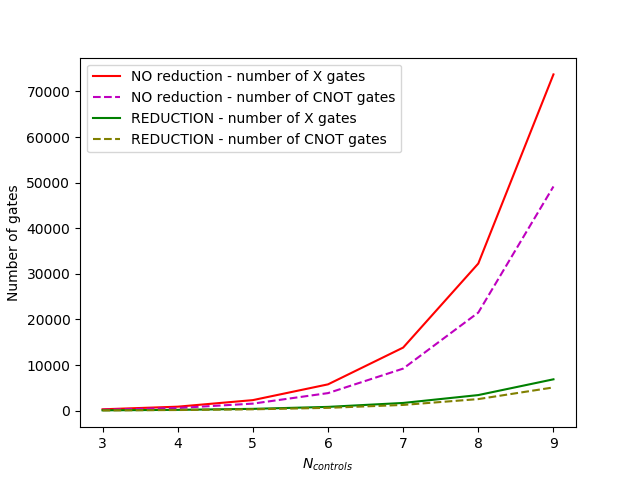

In [424]:
%matplotlib notebook
fig, ax = plt.subplots()

ax.plot(N_ancilla_list, standard_X, color='r', label='NO reduction - number of X gates')
ax.plot(N_ancilla_list, standard_CNOT, color='m', label='NO reduction - number of CNOT gates', linestyle='--')

ax.plot(N_ancilla_list, reduced_X, color='g', label='REDUCTION - number of X gates')
ax.plot(N_ancilla_list, reduced_CNOT, color='olive', label='REDUCTION - number of CNOT gates', linestyle='--')



ax.set(xlabel='$N_{controls}$', ylabel='Number of gates')
#                                         ,title='Scaling of methods')
ax.grid
()
plt.legend()

plt.show()

**$N_{c}=$ Number of controls** = $N_{ancilla}$

- NO reduction
$$N_{CNOT} = 2^{N_{c}+2}(3N_{c}-3)$$
$$N_{singleG} = 2^{N_{c}+1}(9N_{c}-9) $$

- REDUCTION
$$N_{CNOT} = 9(2^{N_{c}})-30$$
$$N_{singleG} =27(2^{N_{c}-1})-46 $$

In [ ]:
# def reduction(n_ancilla_qubits):
    
#     state_array = np.arange(0,2**n_ancilla_qubits,1)
#     grey_state_array =np.array([int_to_Gray(i, n_ancilla_qubits) for i in state_array])
    

#     for state_1_index, state_1 in enumerate(grey_state_array[:-1]):
#         state_2=grey_state_array[state_1_index+1]
        
#         if state_1[0] == state_2[0]:
#             n_common_bits=0
#             for bit_1_index, state_1_bit in enumerate(state_1[1:]):
#                 state_2_bit = state_2[1:][bit_1_index]
#                 if state_1_bit==state_2_bit:
#                     n_common_bits+=1
#                 else:
#                     break
                    
#             if n_common_bits==0:
#                 ## c-T*c-T = X
#                 num_T_removed=2
#                 num_X_added=1
            
#                 # TXT = XT
#                 num_T_removed+=1
                
#             elif n_common_bits==n_ancilla_qubits-2:
#                 # TT = I
#                 num_T_removed=2*n_common_bits
                
#                 # c-T c-T = X
#                 num_T_removed+=2
#                 num_X_added=1
                
#             else:
#                 # TT = I
#                 num_T_removed=2*n_common_bits
                
#                 # c-T c-T = X
#                 num_T_removed+=2
#                 num_X_added=1
                
#                 # TXT = XT
#                 num_T_removed+=1
                
                
#         else:
#             ## c-T*c-T = X
#             num_T_removed=2
#             num_X_added=1
            
#             # TXT = XT
#             num_T_removed+=1
        
#         print(state_1, ' vs ', state_2)
#         if (state_1[0] == state_2[0]) and (n_common_bits!=n_ancilla_qubits-2):
#             print('No. common bits = ', n_common_bits)
#         print('T removed = ',num_T_removed)
#         print('X added   = ',num_X_added)
#         print('###')
#     return num_T_removed, num_X_added
        

# reduction(5)

In [389]:
cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [1, 1]).on(qubits[1], qubits[2],  qubits[3]))

IndexError: list index out of range

In [305]:
qubits = list(cirq.LineQubit.range(4))
circuit = cirq.Circuit(
cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [0, 1]).on(qubits[1], qubits[2],  qubits[3])),
cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [0]).on(qubits[0], qubits[2])),
cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [1, 1]).on(qubits[1], qubits[2],  qubits[3])) 
)
circuit

0: ─────────(0)───────
            │
1: ───(0)───┼─────@───
      │     │     │
2: ───@─────X─────@───
      │           │
3: ───X───────────X───

In [308]:
qubits = list(cirq.LineQubit.range(4))
circuit2 = cirq.Circuit(
    
cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(qubits[2], qubits[3])),
    
cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [0]).on(qubits[0], qubits[2])),
    
cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [0,1]).on(qubits[0], qubits[1],  qubits[3])),

)
circuit2

0: ───────(0)───(0)───
          │     │
1: ───────┼─────@─────
          │     │
2: ───@───X─────┼─────
      │         │
3: ───X─────────X─────

In [309]:
circuit.unitary() == circuit2.unitary()

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  Tru

In [310]:
np.array_equal(circuit.unitary(), circuit2.unitary())

True

In [636]:
qubits = list(cirq.LineQubit.range(4))
circuit = cirq.Circuit(

cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [0]).on(qubits[0], qubits[2])),
cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [0, 1]).on(qubits[1], qubits[2],  qubits[3])),
# cirq.X.on(qubits[3]),
)
circuit

0: ───(0)─────────
      │
1: ───┼─────(0)───
      │     │
2: ───X─────@─────
            │
3: ─────────X─────

In [647]:
qubits = list(cirq.LineQubit.range(4))
circuit2 = cirq.Circuit(

cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [0]).on(qubits[0], qubits[2])),
cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [1, 1]).on(qubits[0], qubits[1],  qubits[3])),
# cirq.I.on(qubits[3]),
)
circuit2

0: ───(0)───@───
      │     │
1: ───┼─────@───
      │     │
2: ───X─────┼───
            │
3: ─────────X───

In [648]:
np.array_equal(circuit.unitary(), circuit2.unitary())

False

In [ ]:
qubits = list(cirq.LineQubit.range(4))
circuit = cirq.Circuit(
cirq.Circuit(cirq.Y.controlled(num_controls=3, control_values=[0,0,0]).on(qubits[0],qubits[1],qubits[2],qubits[3])),
cirq.Circuit(cirq.Y.controlled(num_controls=3, control_values=[1,0,0]).on(qubits[0],qubits[1],qubits[2],qubits[3])),
cirq.Circuit(cirq.Y.controlled(num_controls=3, control_values=[1,1,0]).on(qubits[0],qubits[1],qubits[2],qubits[3])),
cirq.Circuit(cirq.Y.controlled(num_controls=3, control_values=[0,1,0]).on(qubits[0],qubits[1],qubits[2],qubits[3])),
cirq.Circuit(cirq.Y.controlled(num_controls=3, control_values=[0,1,1]).on(qubits[0],qubits[1],qubits[2],qubits[3])),
cirq.Circuit(cirq.Y.controlled(num_controls=3, control_values=[1,1,1]).on(qubits[0],qubits[1],qubits[2],qubits[3])),
cirq.Circuit(cirq.Y.controlled(num_controls=3, control_values=[1,0,1]).on(qubits[0],qubits[1],qubits[2],qubits[3])),
cirq.Circuit(cirq.Y.controlled(num_controls=3, control_values=[0,0,1]).on(qubits[0],qubits[1],qubits[2],qubits[3])),
)
circuit

with open('control_seq.txt', 'w') as outfile:
    outfile.writelines(circuit.to_text_diagram(transpose=False))

In [ ]:
qubits = list(cirq.LineQubit.range(4))
circuit2 = cirq.Circuit(
    cirq.I.on(qubits[0]),
    cirq.I.on(qubits[1]),
    cirq.I.on(qubits[2]),
    cirq.X.on(qubits[3]),)
circuit2

In [ ]:
np.array_equal(circuit.unitary(), circuit2.unitary())

In [ ]:
qubits = list(cirq.LineQubit.range(4))
circuit = cirq.Circuit(
cirq.Circuit(cirq.X.controlled(num_controls=3, control_values=[0,0,0]).on(qubits[0],qubits[1],qubits[2],qubits[3])),
cirq.Circuit(cirq.X.controlled(num_controls=3, control_values=[1,0,0]).on(qubits[0],qubits[1],qubits[2],qubits[3]))
)
circuit

In [ ]:
qubits = list(cirq.LineQubit.range(4))
circuit2 = cirq.Circuit(
cirq.I.on(qubits[0]),
cirq.Circuit(cirq.X.controlled(num_controls=2, control_values=[0,0]).on(qubits[1],qubits[2],qubits[3])),
)
circuit2

In [ ]:
np.array_equal(circuit.unitary(), circuit2.unitary())

## cannot do

In [ ]:
from openfermion.ops import QubitOperator

In [ ]:
QubitOperator('X0')*QubitOperator('Y0')

In [ ]:
class phase_Pauli_gate(cirq.SingleQubitGate):
    """
    Description

    Args:
        theta (float): angle to rotate by in radians.
        number_control_qubits (int): number of control qubits
    """

    def __init__(self, phase, pauli_str):
        self.phase = phase
        self.pauli_str = pauli_str

    def _unitary_(self):
        if self.pauli_str == 'X':
            return cirq.X._unitary_()*self.phase
        elif self.pauli_str == 'Y':
            return cirq.Y._unitary_()*self.phase
        elif self.pauli_str == 'Z':
            return cirq.Z._unitary_()*self.phase
        elif self.pauli_str == 'I':
            return cirq.I._unitary_()*self.phase
        else:
            raise ValueError('Not a Pauli operation')

    def num_qubits(self):
        return 1

    def _circuit_diagram_info_(self, args):
        return str(self.phase) +'*'+self.pauli_str

    def __str__(self):
        return str(self.phase) +'*'+self.pauli_str

    def __repr__(self):
        return self.__str__()

In [ ]:
QubitOperator('Y0',-1)*QubitOperator('Z0', 1j)

In [ ]:
qubits = list(cirq.LineQubit.range(4))
circuit = cirq.Circuit(
cirq.Circuit(cirq.X.controlled(num_controls=3, control_values=[0,0,0]).on(qubits[0],qubits[1],qubits[2],qubits[3])),
cirq.Circuit(cirq.Y.controlled(num_controls=3, control_values=[1,0,0]).on(qubits[0],qubits[1],qubits[2],qubits[3]))
)
circuit

In [ ]:
phase_Z0_gate = phase_Pauli_gate(1j, 'Z')
phase_Y_gate = phase_Pauli_gate(-1, 'Y')

qubits = list(cirq.LineQubit.range(4))
circuit2 = cirq.Circuit(
#     cirq.Circuit(phase_Y_gate.controlled(num_controls=1, control_values=[0]).on(qubits[0],qubits[3])),
#     cirq.Circuit(cirq.X.controlled(num_controls=1, control_values=[1]).on(qubits[0],qubits[3])),
    cirq.I.on(qubits[0]),
    cirq.Circuit(phase_Z0_gate.controlled(num_controls=2, control_values=[0,0]).on(qubits[1],qubits[2],qubits[3])),
)
circuit2

In [ ]:
np.array_equal(circuit.unitary(), circuit2.unitary())

In [ ]:
OP1=QubitOperator('X0 I1',1)+QubitOperator('X0 Y1',1)

OP2=QubitOperator('Z0 Z1',1)+QubitOperator('Y0 X1',1)

In [ ]:
OP1*OP2==OP2*OP1

In [ ]:
OP1=QubitOperator('X0 X1',1)+QubitOperator('Z0 Z1',1)

OP2=QubitOperator('Y0 Y1',1)
OP1*OP2==OP2*OP1

In [ ]:
OP1=QubitOperator('Y0',1)

OP2=QubitOperator('X0',1)
OP1*OP2

In [ ]:
1j*1j*-1j

In [52]:
qubits = list(cirq.LineQubit.range(3))
circuit = cirq.Circuit(
cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [0, 1]).on(qubits[0], qubits[1],  qubits[2])),
cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [1, 0]).on(qubits[0], qubits[1],  qubits[2])),
)


0: ───(0)───@─────
      │     │
1: ───@─────(0)───
      │     │
2: ───X─────X─────

In [67]:
circuit.unitary()

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [626]:
qubits = list(cirq.LineQubit.range(3))
circuit2 = cirq.Circuit(
    cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [1, 1]).on(qubits[0], qubits[1],  qubits[2])),
    cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [0, 0]).on(qubits[0], qubits[1],  qubits[2])),
    cirq.X.on(qubits[2]),
    )
circuit2

0: ───@───(0)───────
      │   │
1: ───@───(0)───────
      │   │
2: ───X───X─────X───

In [627]:
circuit.unitary() == circuit2.unitary()

/home/lex/anaconda3/envs/QuantumUpdated/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [628]:
qubits = list(cirq.LineQubit.range(3))
circuit3 = cirq.Circuit(
    cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(qubits[0],  qubits[2])),
    cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(qubits[1],  qubits[2])),
    )
circuit3

0: ───@───────
      │
1: ───┼───@───
      │   │
2: ───X───X───

In [95]:
circuit.unitary() == circuit3.unitary()

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [187]:
def remove_identity(unsimplified_circuit):
    
    # removes T T = I
    # T controls must be same values and on same qubits!
    
    new_circuit=[]
    unsimplified_circuit = list(unsimplified_circuit.all_operations())
    
    for index, operation_left in enumerate(unsimplified_circuit[:-1]):
        operation_right = unsimplified_circuit[index+1]
        
        if (isinstance(operation_left, cirq.ops.controlled_operation.ControlledOperation)) and (isinstance(operation_left, cirq.ops.controlled_operation.ControlledOperation)):
            if (operation_left.controls == operation_right.controls) and (operation_left.control_values==operation_right.control_values):
                continue
            else:
                new_circuit.append(operation_right)
    
    simplified_circuit = cirq.Circuit(new_circuit)
    if unsimplified_circuit == list(simplified_circuit.all_operations()):
        return simplified_circuit
    else:
        return remove_identity(simplified_circuit)
    

In [1015]:
def remove_TT_to_I(unsimplified_circuit):
    
    # removes T T with same controls line qubits
    # (aa)-T (aa)-T = I
    # (11)-T (10)-T = (1F)-X
    # (10)-T (01)-T = (1F)-X (F1)-X
    # (11)-t (00)-T = (1F)-X (F1)-X X
    
    # ^ prioratises better reduction
    # F = filler
    
    # T controls must be same values and on same qubits!
    
    new_circuit=[]
    unsimplified_circuit = list(unsimplified_circuit.all_operations())
    
    break_flag = False
    for index, operation_left in enumerate(unsimplified_circuit[:-1]):
        operation_right = unsimplified_circuit[index+1]
        
        if break_flag is True:
            break
            
        elif (isinstance(operation_left, cirq.ops.controlled_operation.ControlledOperation)) and (isinstance(operation_left, cirq.ops.controlled_operation.ControlledOperation)):
            if (operation_left.controls == operation_right.controls) and (operation_left.control_values == operation_right.control_values):
                break_flag=True
                # TT = I
                continue        
            else:
                new_circuit.append(operation_left)
                
    new_circuit.append(unsimplified_circuit[index+1::])
    
    
    simplified_circuit = cirq.Circuit(new_circuit)
    if unsimplified_circuit == list(simplified_circuit.all_operations()):
        return simplified_circuit
    else:
        return remove_TT_to_I(simplified_circuit)
            
a = remove_TT_to_I(non_simplified)
a

0: ───(0)───────────────────────────────────────────────────────────────────────────────(0)───(0)───────────────────────────────────────────────────────────────────────────────(0)───@───────────────────────────────────────────────────────────────────────────────@───@─────────────────────────────────────────────────────────────────────────────────@─────
      │                                                                                 │     │                                                                                 │     │                                                                               │   │                                                                                 │
1: ───(0)───────────────────────────────────────────────────────────────────────────────(0)───@─────────────────────────────────────────────────────────────────────────────────@─────@───────────────────────────────────────────────────────────────────────────────@───(0)───────────────────────────────────────────────────────────────────────────────(0)───
      │                                                                                 │     │                                                                                 │     │                                                                               │   │                                                                                 │
2: ───┼─────(0)───────────────────────────────(0)───@───────────────────────────────@───┼─────┼─────@───────────────────────────────@───(0)───────────────────────────────(0)───┼─────┼───(0)───────────────────────────────(0)───@───────────────────────────────@───┼───┼─────@───────────────────────────────@───(0)───────────────────────────────(0)───┼─────
      │     │                                 │     │                               │   │     │     │                               │   │                                 │     │     │   │                                 │     │                               │   │   │     │                               │   │                                 │     │
3: ───┼─────┼─────(0)───────(0)───@───────@───┼─────┼───@───────@───(0)───────(0)───┼───┼─────┼─────┼───(0)───────(0)───@───────@───┼───┼─────@───────@───(0)───────(0)───┼─────┼─────┼───┼─────(0)───────(0)───@───────@───┼─────┼───@───────@───(0)───────(0)───┼───┼───┼─────┼───(0)───────(0)───@───────@───┼───┼─────@───────@───(0)───────(0)───┼─────┼─────
      │     │     │         │     │       │   │     │   │       │   │         │     │   │     │     │   │         │     │       │   │   │     │       │   │         │     │     │     │   │     │         │     │       │   │     │   │       │   │         │     │   │   │     │   │         │     │       │   │   │     │       │   │         │     │     │
4: ───X─────@─────┼─────────┼─────┼───────┼───@─────@───┼───────┼───┼─────────┼─────@───X─────X─────@───┼─────────┼─────┼───────┼───@───@─────┼───────┼───┼─────────┼─────@─────X─────X───@─────┼─────────┼─────┼───────┼───@─────@───┼───────┼───┼─────────┼─────@───X───X─────@───┼─────────┼─────┼───────┼───@───@─────┼───────┼───┼─────────┼─────@─────X─────
            │     │         │     │       │   │     │   │       │   │         │     │               │   │         │     │       │   │   │     │       │   │         │     │               │     │         │     │       │   │     │   │       │   │         │     │             │   │         │     │       │   │   │     │       │   │         │     │
5: ─────────X─────@─────────@─────@───────@───X─────X───@───────@───@─────────@─────X───────────────X───@─────────@─────@───────@───X───X─────@───────@───@─────────@─────X───────────────X─────@─────────@─────@───────@───X─────X───@───────@───@─────────@─────X─────────────X───@─────────@─────@───────@───X───X─────@───────@───@─────────@─────X───────────
                  │         │     │       │             │       │   │         │                         │         │     │     

In [1013]:
non_simplified

0: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────────(0)───@───────────────────────────────@───@───────────────────────────@───@───────────────────────@───@───────────────────────────@───@─────────────────────────────@─────@─────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────────@─────
      │                                 │     │                             │     │                         │     │                             │     │                             │     │                         │     │                             │     │                                 │     │                               │   │                           │   │                       │   │                           │   │                             │     │                         │     │                             │     │                                 │
1: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───@─────────────────────────────@─────@─────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────────@─────@───────────────────────────────@───@───────────────────────────@───@───────────────────────@───@───────────────────────────@───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────────(0)───
      │                                 │     │                             │     │                         │     │                             │     │                             │     │                         │     │                             │     │                                 │     │                               │   │                           │   │                       │   │                           │   │                             │     │                         │     │                             │     │                                 │
2: ───┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────@───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────(0)───┼─────┼─────(0)───────────────────(0)───┼─────┼───(0)───────────────────(0)───┼───┼───(0)───────────────(0)───┼───┼───@───────────────@───┼───┼───@───────────────────@───┼───┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────(0)───┼─────┼─────(0)───────────────────(0)───┼─────
      │     │                     │     │     │     │                 │     │     │     │               │   │     │     │                   │   │     │     │                   │   │     │     │               │   │     │     │                 │     │     │     │                     │     │     │   │                     │     │   │   │                 │     │   │   │               │   │   │   │                   │   │   │     │                   │   │     │     │               │   │     │     │                 │     │     │     │                     │     │
3: ───┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───@───────@───┼───┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼─────(0)───────(0)───┼─────┼─────┼───┼─────(0)───────(0)───┼─────┼───┼───┼─────@───────@───┼─────┼───┼───┼───@───────@───┼───┼───┼───┼───(0)───────(0)───┼───┼───┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼─────(0)───────(0)───┼─────┼─────
      │     │     │         │     │     │     

In [16]:
def remove_TT_terms(unsimplified_circuit):
    
    # removes T T with same controls line qubits
    # (aa)-T (aa)-T = I
    # (11)-T (10)-T = (1F)-X
    # (10)-T (01)-T = (1F)-X (F1)-X
    # (11)-t (00)-T = (1F)-X (F1)-X X
    
    # ^ prioratises better reduction
    # F = filler
    
    # T controls must be same values and on same qubits!
    
    new_circuit=[]
    unsimplified_circuit = list(unsimplified_circuit.all_operations())
    
    break_flag = False
    for index, operation_left in enumerate(unsimplified_circuit[:-1]):
        operation_right = unsimplified_circuit[index+1]
        
        if break_flag is True:
            break
            
        elif (isinstance(operation_left, cirq.ops.controlled_operation.ControlledOperation)) and (isinstance(operation_right, cirq.ops.controlled_operation.ControlledOperation)):
            if (operation_left.controls == operation_right.controls):
                break_flag=True
                
                control_values_left=np.ravel(operation_left.control_values)
                control_values_right=np.ravel(operation_right.control_values)
                if np.array_equal(control_values_left, control_values_right):
                    # TT = I
                    continue
                elif bool(sum(control_values_left + control_values_right)%2):
                    # (11)-T (10)-T = (1F)-X
                    common_index = int(np.where(control_values_left==control_values_right)[0][0])
                    system_qubit = operation_left.sub_operation.qubits[0]
                    control_qubit = operation_left.controls[common_index]
                    new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [int(control_values_left[common_index])]).on(control_qubit,  system_qubit)))
                
                else:
                    if bool(sum(control_values_left)%2):
                        # (10)-T (01)-T = (1F)-X (F1)-X
                        new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(operation_left.controls[0],  operation_left.sub_operation.qubits[0])))
                        new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(operation_left.controls[1],  operation_left.sub_operation.qubits[0])))
                        
                    else:
                        # (11)-t (00)-T = (1F)-X (F1)-X X
                        new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(operation_left.controls[0],  operation_left.sub_operation.qubits[0])))
                        new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(operation_left.controls[1],  operation_left.sub_operation.qubits[0])))
                        new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=1,control_values= [1]).on(operation_left.controls[0],  operation_left.sub_operation.qubits[0])))
                        new_circuit.append(cirq.Circuit(cirq.X.on(operation_left.sub_operation.qubits[0])))
                
                
            else:
                new_circuit.append(operation_left)
                
    new_circuit.append(unsimplified_circuit[index+1::])
    
    
    simplified_circuit = cirq.Circuit(new_circuit)
    if unsimplified_circuit == list(simplified_circuit.all_operations()):
        return simplified_circuit
    else:
        return remove_TT_terms(simplified_circuit)

    
from cirq.circuits import InsertStrategy
def remove_TxT_terms(unsimplified_circuit):
    
    # removes TxT with T terms on same qubits and X controlled by alt qubits
    # (aa)-T (b)-X (aa)-T ==> (b)-X (ba)-T
    # F = filler
    
    # T controls must be same values and on same qubits!
    
    
    new_circuit=[]
    unsimplified_circuit = list(unsimplified_circuit.all_operations())
    
    simplified=False
    for index, operation_1 in enumerate(unsimplified_circuit[:-2]):
        operation_2 = unsimplified_circuit[index+1]
        operation_3 = unsimplified_circuit[index+2]
        
        if (len(operation_1.controls)==2) and (len(operation_3.controls)==2) and (operation_1.controls == operation_3.controls):
            if (len(operation_2.controls)==1) and (operation_2.sub_operation.gate.__str__()=='X'):
                
                X_qubit = operation_2.sub_operation.qubits[0]
                
                if X_qubit in operation_1.controls:
                    common_index = operation_1.controls.index(X_qubit)
                    if common_index == 0:
                        control_to_keep = operation_1.controls[1]
                        T_control_val = int(operation_1.control_values[1][0])
                    else:
                        control_to_keep = operation_1.controls[0]
                        T_control_val = int(operation_1.control_values[0][0])
                    
                    X_control_q= operation_2.controls[0]
                    X_control_val = int(operation_2.control_values[0][0])
                    active_qubit = operation_1.sub_operation.qubits[0]
                    
                    new_circuit.append(operation_2)
                    new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [X_control_val, T_control_val]).on(X_control_q,  control_to_keep, active_qubit)))
                    

#                     print(operation_1, operation_2, operation_3)
#                     print('control=', X_control_val, T_control_val, 'qubit', active_qubit)
#                     print(cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [X_control_val, T_control_val]).on(X_control_q,  control_to_keep, active_qubit)))
                    
                    simplified=True
                    new_circuit.append(unsimplified_circuit[index+3::])
                    break
        else:
            new_circuit.append(operation_1)
    
    if simplified is True:
#         simplified_circuit = cirq.Circuit(new_circuit)

        simplified_circuit = cirq.Circuit()
        for operation in list(b.all_operations()):
            simplified_circuit.append(operation, strategy=InsertStrategy.NEW)
            
        return remove_TxT_terms(simplified_circuit)
    else:
        return cirq.Circuit(unsimplified_circuit)

In [1038]:
from cirq.circuits import InsertStrategy
def remove_TxT_terms(unsimplified_circuit):
    
    # removes TxT with T terms on same qubits and X controlled by alt qubits
    # (aa)-T (b)-X (aa)-T ==> (b)-X (ba)-T
    # F = filler
    
    # T controls must be same values and on same qubits!
    
    
    new_circuit= cirq.Circuit()
    unsimplified_circuit = list(unsimplified_circuit.all_operations())
    
    simplified=False
    for index, operation_1 in enumerate(unsimplified_circuit[:-2]):
        operation_2 = unsimplified_circuit[index+1]
        operation_3 = unsimplified_circuit[index+2]
        
        if (len(operation_1.controls)==2) and (len(operation_3.controls)==2) and (operation_1.controls == operation_3.controls):
            if (len(operation_2.controls)==1) and (operation_2.sub_operation.gate.__str__()=='X'):
                
                X_qubit = operation_2.sub_operation.qubits[0]
                
                if X_qubit in operation_1.controls:
                    common_index = operation_1.controls.index(X_qubit)
                    if common_index == 0:
                        control_to_keep = operation_1.controls[1]
                        T_control_val = int(operation_1.control_values[1][0])
                    else:
                        control_to_keep = operation_1.controls[0]
                        T_control_val = int(operation_1.control_values[0][0])
                    
                    X_control_q= operation_2.controls[0]
                    X_control_val = int(operation_2.control_values[0][0])
                    active_qubit = operation_1.sub_operation.qubits[0]
                    
                    new_circuit.append(operation_2, strategy=InsertStrategy.NEW_THEN_INLINE)
                    new_circuit.append(cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [X_control_val, T_control_val]).on(X_control_q,  control_to_keep, active_qubit)), 
                                                                               strategy=InsertStrategy.NEW_THEN_INLINE)
                    

#                     print(operation_1, operation_2, operation_3)
#                     print('control=', X_control_val, T_control_val, 'qubit', active_qubit)
#                     print(cirq.Circuit(cirq.X.controlled(num_controls=2,control_values= [X_control_val, T_control_val]).on(X_control_q,  control_to_keep, active_qubit)))
                    
                    simplified=True
                    new_circuit.append(unsimplified_circuit[index+3::], strategy=InsertStrategy.NEW_THEN_INLINE)
                    break
        else:
            new_circuit.append(operation_1, strategy=InsertStrategy.NEW_THEN_INLINE)
    
    if simplified is True:
#         simplified_circuit = cirq.Circuit(new_circuit)

#         simplified_circuit = cirq.Circuit()
#         for operation in list(b.all_operations()):
#             simplified_circuit.append(operation, strategy=InsertStrategy.NEW)
            
        return remove_TxT_terms(new_circuit)
    else:
        return cirq.Circuit(unsimplified_circuit)

In [17]:
a = remove_TT_terms(non_simplified)
a

NameError: name 'non_simplified' is not defined

In [1045]:
b = remove_TxT_terms(a)

np.array_equal(non_simplified.unitary(),b.unitary())

True

In [1052]:
one=remove_TT_terms(non_simplified_grey)
two=remove_TxT_terms(one)
print(len(list(two.all_operations())))
two

50


0: ───(0)───────────────────────────────(0)─────────────────(0)───────────────────────────────────────────────────────────────────────@─────────────────@─────────────────────────────────────────────────@─────
      │                                 │                   │                                                                         │                 │                                                 │
1: ───(0)───────────────────────────────┼───────────────────┼───────────────────────────@─────────────────@───────────────────────────┼─────────────────┼─────────────────────────────────────────────────(0)───
      │                                 │                   │                           │                 │                           │                 │                                                 │
2: ───┼─────(0)─────────────────────────┼───────────────────@───────────────────────────┼─────────────────(0)─────────────────────────┼─────────────────@───────────────────────────────────────────(0)───┼─────
      │     │                           │                   │                           │                 │                           │                 │                                           │     │
3: ───┼─────┼─────(0)───────────────@───┼─────────────(0)───┼─────(0)───────────────@───┼───────────(0)───┼─────(0)───────────────@───┼───────────(0)───┼───(0)───────────────@───────────────(0)───┼─────┼─────
      │     │     │                 │   │             │     │     │                 │   │           │     │     │                 │   │           │     │   │                 │               │     │     │
4: ───X─────@─────┼─────────────@───@───X─────────────┼─────┼─────┼─────────────@───@───X───────────┼─────┼─────┼─────────────@───@───X───────────┼─────┼───┼─────────────@───@───────────────┼─────@─────X─────
            │     │             │   │                 │     │     │             │   │               │     │     │             │   │               │     │   │             │   │               │     │
5: ─────────X─────@─────────@───X───┼─────────@───────@─────X─────@─────────@───X───┼───────@───────@─────X─────@─────────@───X───┼───────@───────@─────X───@─────────@───X───┼───────@───────@─────X───────────
                  │         │       │         │       │           │         │       │       │       │           │         │       │       │       │         │         │       │       │       │
6: ───────────────X─────@───X───@───X───@─────X───@───X───────────X─────@───X───@───X───@───X───@───X───────────X─────@───X───@───X───@───X───@───X─────────X─────@───X───@───X───@───X───@───X─────────────────
                        │       │       │         │                     │       │       │       │                     │       │       │       │                   │       │       │       │
7: ─────────────────────Y───────Y───────Y─────────Y─────────────────────Y───────Y───────Y───────Y─────────────────────Y───────Y───────Y───────Y───────────────────Y───────Y───────Y───────Y─────────────────────

In [1053]:
one=remove_TT_terms(non_simplified_binary)
two=remove_TxT_terms(one)
print(len(list(two.all_operations())))
two

52


0: ───(0)───────────────────────────────(0)───────────────(0)─────────────────────────────────────────────@───────────────────────────────────@───────────────@─────────────────────────────────────────────@───
      │                                 │                 │                                               │                                   │               │                                             │
1: ───(0)───────────────────────────────┼─────────────────┼───────────────────────────────────────────────┼───@───────────────────────────────┼───────────────┼─────────────────────────────────────────────@───
      │                                 │                 │                                               │   │                               │               │                                             │
2: ───┼─────(0)─────────────────────────┼─────────────────@───────────────────────────────────────────@───┼───┼───(0)─────────────────────────┼───────────────@─────────────────────────────────────────@───┼───
      │     │                           │                 │                                           │   │   │   │                           │               │                                         │   │
3: ───┼─────┼─────(0)───────────────@───┼─────────────@───┼─────(0)───────────────@───────────────@───┼───┼───┼───┼─────(0)───────────────@───┼───────────@───┼───(0)───────────────@───────────────@───┼───┼───
      │     │     │                 │   │             │   │     │                 │               │   │   │   │   │     │                 │   │           │   │   │                 │               │   │   │
4: ───X─────@─────┼─────────────@───@───X─────────────┼───┼─────┼─────────────@───@───────────────┼───@───X───X───@─────┼─────────────@───@───X───────────┼───┼───┼─────────────@───@───────────────┼───@───X───
            │     │             │   │                 │   │     │             │   │               │   │           │     │             │   │               │   │   │             │   │               │   │
5: ─────────X─────@─────────@───X───┼─────────@───────@───X─────@─────────@───X───┼───────@───────@───X───────────X─────@─────────@───X───┼───────@───────@───X───@─────────@───X───┼───────@───────@───X───────
                  │         │       │         │       │         │         │       │       │       │                     │         │       │       │       │       │         │       │       │       │
6: ───────────────X─────@───X───@───X───@─────X───@───X─────────X─────@───X───@───X───@───X───@───X─────────────────────X─────@───X───@───X───@───X───@───X───────X─────@───X───@───X───@───X───@───X───────────
                        │       │       │         │                   │       │       │       │                               │       │       │       │                 │       │       │       │
7: ─────────────────────Y───────Y───────Y─────────Y───────────────────Y───────Y───────Y───────Y───────────────────────────────Y───────Y───────Y───────Y─────────────────Y───────Y───────Y───────Y───────────────

In [1048]:
non_simplified_binary

0: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───@─────────────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────@─────@─────────────────────────@─────@───────────────────────────────@───@───────────────────────────@───@───────────────────────────@───@───────────────────────@───
      │                                 │     │                             │     │                             │     │                         │     │                                 │     │                             │     │                             │     │                         │     │                                 │     │                             │     │                             │     │                         │     │                               │   │                           │   │                           │   │                       │
1: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───@─────────────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────@─────@─────────────────────────@─────(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───@───────────────────────────────@───@───────────────────────────@───@───────────────────────────@───@───────────────────────@───
      │                                 │     │                             │     │                             │     │                         │     │                                 │     │                             │     │                             │     │                         │     │                                 │     │                             │     │                             │     │                         │     │                               │   │                           │   │                           │   │                       │
2: ───┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼───(0)───────────────────(0)───┼───┼───(0)───────────────(0)───┼───┼───@───────────────────@───┼───┼───@───────────────@───┼───
      │     │                     │     │     │     │                 │     │     │     │                   │   │     │     │               │   │     │     │                     │     │     │     │                 │     │     │     │                   │   │     │     │               │   │     │     │                     │     │     │     │                 │     │     │     │                   │   │     │     │               │   │     │   │                     │     │   │   │                 │     │   │   │                   │   │   │   │               │   │
3: ───┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼───┼─────(0)───────(0)───┼─────┼───┼───┼─────@───────@───┼─────┼───┼───┼───(0)───────(0)───┼───┼───┼───┼───@───────@───┼───┼───
      │     │     │         │     │     

In [1049]:
non_simplified_grey

0: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────────(0)───@───────────────────────────────@───@───────────────────────────@───@───────────────────────@───@───────────────────────────@───@─────────────────────────────@─────@─────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────────@─────
      │                                 │     │                             │     │                         │     │                             │     │                             │     │                         │     │                             │     │                                 │     │                               │   │                           │   │                       │   │                           │   │                             │     │                         │     │                             │     │                                 │
1: ───(0)───────────────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───@─────────────────────────────@─────@─────────────────────────@─────@─────────────────────────────@─────@─────────────────────────────────@─────@───────────────────────────────@───@───────────────────────────@───@───────────────────────@───@───────────────────────────@───(0)───────────────────────────(0)───(0)───────────────────────(0)───(0)───────────────────────────(0)───(0)───────────────────────────────(0)───
      │                                 │     │                             │     │                         │     │                             │     │                             │     │                         │     │                             │     │                                 │     │                               │   │                           │   │                       │   │                           │   │                             │     │                         │     │                             │     │                                 │
2: ───┼─────(0)───────────────────(0)───┼─────┼─────(0)───────────────(0)───┼─────┼─────@───────────────@───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────(0)───┼─────┼─────(0)───────────────────(0)───┼─────┼───(0)───────────────────(0)───┼───┼───(0)───────────────(0)───┼───┼───@───────────────@───┼───┼───@───────────────────@───┼───┼─────@───────────────────@───┼─────┼─────@───────────────@───┼─────┼─────(0)───────────────(0)───┼─────┼─────(0)───────────────────(0)───┼─────
      │     │                     │     │     │     │                 │     │     │     │               │   │     │     │                   │   │     │     │                   │   │     │     │               │   │     │     │                 │     │     │     │                     │     │     │   │                     │     │   │   │                 │     │   │   │               │   │   │   │                   │   │   │     │                   │   │     │     │               │   │     │     │                 │     │     │     │                     │     │
3: ───┼─────┼─────(0)───────(0)───┼─────┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼───@───────@───┼───┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼─────(0)───────(0)───┼─────┼─────┼───┼─────(0)───────(0)───┼─────┼───┼───┼─────@───────@───┼─────┼───┼───┼───@───────@───┼───┼───┼───┼───(0)───────(0)───┼───┼───┼─────┼───(0)───────(0)───┼───┼─────┼─────┼───@───────@───┼───┼─────┼─────┼─────@───────@───┼─────┼─────┼─────┼─────(0)───────(0)───┼─────┼─────
      │     │     │         │     │     │     